In [1]:
# ALL Libraries needed here

# Data Loading, Manipulation and Analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

#Splitting Dataset
from sklearn.model_selection import train_test_split 

# model training
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ParameterGrid

# Cluster Analysis
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import fcluster

# Prediction and measurement
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

#Visualization
import matplotlib.pyplot as plt

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Reading the Data

In [2]:
# Define the Excel file path and sheet names
file_path = 'FeatureEngineeringProjectData2021-2022.xlsx'

# Create an ExcelFile object to open the file
xls = pd.ExcelFile(file_path)

# Get a list of all sheet names (tabs) in the Excel file 
# Getting sheet names as each sheet has data for a new week
sheet_names = xls.sheet_names
print(sheet_names)

len(sheet_names)

['1-1-2021', '1-8-2021', '1-15-2021', '1-22-2021', '1-29-2021', '2-5-2021', '2-12-2021', '2-19-2021', '2-26-2021', '3-5-2021', '3-12-2021', '3-19-2021', '3-26-2021', '4-2-2021', '4-9-2021', '4-16-2021', '4-23-2021', '4-30-2021', '5-7-2021', '5-14-2021', '5-21-2021', '5-28-2021', '6-4-2021', '6-11-2021', '6-18-2021', '6-25-2021', '7-2-2021', '7-9-2021', '7-16-2021', '7-23-2021', '7-30-2021', '8-6-2021', '8-13-2021', '8-20-2021', '8-27-2021', '9-3-2021', '9-10-2021', '9-17-2021', '9-24-2021', '10-1-2021', '10-8-2021', '10-15-2021', '10-22-2021', '10-29-2021', '11-5-2021', '11-12-2021', '11-19-2021', '11-26-2021', '12-3-2021', '12-10-2021', '12-17-2021', '12-24-2021', '12-31-2021', '1-7-2022', '1-14-2022', '1-21-2022', '1-28-2022', '2-4-2022', '2-11-2022', '2-18-2022', '2-25-2022', '3-4-2022', '3-11-2022', '3-18-2022', '3-25-2022', '4-1-2022', '4-8-2022', '4-15-2022', '4-22-2022', '4-29-2022', '5-6-2022', '5-13-2022', '5-20-2022', '5-27-2022', '6-3-2022', '6-10-2022', '6-17-2022', '6-24-2

105

#### Now we cant to create a list of dataframes for every excel sheet and then combine them to make one dataframe with 4 columns. 

In [3]:
# Create an empty list to store DataFrames
df_list = []

# Iterate through each sheet (date)
for sheet_name in sheet_names:
 # Read data from the current sheet, skipping the first row and using the second row as column names
    df = pd.read_excel(xls, sheet_name=sheet_name, header=0, skiprows=[0])
    
    # Add a 'Date' column with the current sheet's name
    df['Date'] = sheet_name
    
    # Append the DataFrame to the list
    df_list.append(df)

# shows our list of data frames 
df_list

[     Symbol   Price  Vol. (1000s)      Date
 0      ALRS   27.37            26  1-1-2021
 1      AMRC   52.37           278  1-1-2021
 2      APPS   56.56          1894  1-1-2021
 3      AVNW   34.15            81  1-1-2021
 4       CCB   21.00            15  1-1-2021
 ...     ...     ...           ...       ...
 8066    ZIG   22.94             3  1-1-2021
 8067   ZJPN   88.54             2  1-1-2021
 8068   ZROZ  163.69            57  1-1-2021
 8069    ZSL    6.85          1048  1-1-2021
 8070    ZTR    8.79           165  1-1-2021
 
 [8071 rows x 4 columns],
      Symbol   Price  Vol. (1000s)      Date
 0      AEIS  112.26           236  1-8-2021
 1      ALRS   29.46            24  1-8-2021
 2      AMRC   61.33          1057  1-8-2021
 3      APPS   52.11          2588  1-8-2021
 4      ASML  508.74           724  1-8-2021
 ...     ...     ...           ...       ...
 8084   ZJPN   90.62             3  1-8-2021
 8085   ZNTE   10.44           504  1-8-2021
 8086   ZROZ  153.45       

In [4]:
# Concatenate all DataFrames into one using pd.concat
combined_df = pd.concat(df_list, ignore_index=True)
# shows top 5 rows of our comined df
combined_df.head()

Symbol  Price  Vol. (1000s)      Date
0   ALRS  27.37            26  1-1-2021
1   AMRC  52.37           278  1-1-2021
2   APPS  56.56          1894  1-1-2021
3   AVNW  34.15            81  1-1-2021
4    CCB  21.00            15  1-1-2021

#### Now that we have our dataframe ready, we want to analyze, explore and clean the data. 

## Data Preprocessing

### Check for missing values in the dataframe

In [5]:
#check if all values in each column of the dataframe are missing 
print(combined_df.isnull().all())

Symbol          False
Price           False
Vol. (1000s)    False
Date            False
dtype: bool


In [6]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966787 entries, 0 to 966786
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Symbol        966760 non-null  object 
 1   Price         966787 non-null  float64
 2   Vol. (1000s)  966787 non-null  int64  
 3   Date          966787 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 29.5+ MB


We can see that there are 966760 non-null rows in the column 'Symbol' but 966787 non-null rows in the rest of the columns. That means there are some rows that contains nan values in Symbol column that we want to drop. 

In [7]:
# check if any row contains NaN values
contains_nan = combined_df.isna().any(axis=1)

# Print rows that contain NaN values
rows_with_nan = combined_df[contains_nan]
print(rows_with_nan)

       Symbol  Price  Vol. (1000s)        Date
714617    NaN   9.50             0    7-1-2022
724303    NaN   9.50             0    7-8-2022
730234    NaN   7.20            32   7-15-2022
739608    NaN   6.79            37   7-22-2022
749417    NaN   9.62           858   7-29-2022
759232    NaN   7.09           406    8-5-2022
767593    NaN   6.37            32   8-12-2022
777495    NaN   6.05            35   8-19-2022
787193    NaN   5.30            55   8-26-2022
797765    NaN   4.47          3907    9-2-2022
807445    NaN   4.04           131    9-9-2022
816136    NaN   5.56           244   9-16-2022
826672    NaN   3.97           139   9-23-2022
836710    NaN   1.61           232   9-30-2022
846045    NaN   1.57            44   10-7-2022
856018    NaN   1.29           179  10-14-2022
865725    NaN   1.19           262  10-21-2022
875495    NaN   1.28            34  10-28-2022
885184    NaN   1.12            50   11-4-2022
894644    NaN   1.29           149  11-11-2022
903977    NaN

Removing rows that contain 'NaN' values

In [8]:
df_cleaned = combined_df.dropna()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 966760 entries, 0 to 966786
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Symbol        966760 non-null  object 
 1   Price         966760 non-null  float64
 2   Vol. (1000s)  966760 non-null  int64  
 3   Date          966760 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 36.9+ MB


#### We can see that there are no missing values in the data frame. There are 4 columns and 966760 rows in this data frame. The data types are correctly set for all columns except for date. Data type needs to be changed for date column to datetime64. 

In [9]:
# Convert the 'Date' column to datetime
df_cleaned.loc[:,'Date'] = pd.to_datetime(df_cleaned['Date'])

In [10]:
df_cleaned.dtypes

Symbol                  object
Price                  float64
Vol. (1000s)             int64
Date            datetime64[ns]
dtype: object

#### To make sure all the symbols have records for all dates and nothing is missing, we want to check the total number of unique dates in the dataset. We also want to group the data by symbol and count the number of unique dates for each symbol. And filter out the symbols that have a unique date count less than the total count of unique dates.

In [11]:
# Calculate the total number of unique dates
total_dates = df_cleaned['Date'].nunique()
print(total_dates)

105


In [12]:
# Group the data by symbol and count unique dates for each symbol
symbol_date_counts = df_cleaned.groupby('Symbol')['Date'].nunique().reset_index()
symbol_date_counts

Symbol  Date
0          A   105
1         AA   105
2        AAA   105
3       AAAU   105
4        AAC    93
...      ...   ...
11160    ZWS    65
11161     ZY    79
11162   ZYME   105
11163   ZYNE   105
11164   ZYXI   105

[11165 rows x 2 columns]

In [13]:
symbols_with_less_than_105_dates = symbol_date_counts[symbol_date_counts['Date'] < 105]['Symbol']
symbols_with_less_than_105_dates.count()

4271

#### We saw that 4271 symbols do not have records for all dates. Thus, we will filter them out of our data set. 

In [14]:
# Drop all the symbols with date counts less than 105
filtered_df = df_cleaned[~df_cleaned['Symbol'].isin(symbols_with_less_than_105_dates)]
print(filtered_df.shape)
filtered_df.head()

(723870, 4)


Symbol  Price  Vol. (1000s)       Date
0   ALRS  27.37            26 2021-01-01
1   AMRC  52.37           278 2021-01-01
2   APPS  56.56          1894 2021-01-01
3   AVNW  34.15            81 2021-01-01
4    CCB  21.00            15 2021-01-01

In [15]:
# sort filtered_df by symbol and then by date
sorted_df = filtered_df.sort_values(by=['Symbol', 'Date'])
sorted_df.head()

Symbol   Price  Vol. (1000s)       Date
576        A  118.52          1279 2021-01-01
8595       A  127.20          1550 2021-01-08
16685      A  126.24          1765 2021-01-15
24743      A  126.27          1364 2021-01-22
33081      A  120.19          1410 2021-01-29

In [16]:
sorted_df['Symbol'].nunique()

6894

There are 6,894 symbols left after filtering out the symbols with missing record for certain dates. 

In [17]:
# rename Vol. (1000s) column to Volume for convenience
sorted_df.rename(columns={'Vol. (1000s)':'Volume'}, inplace=True)

In [18]:
sorted_df.head()

Symbol   Price  Volume       Date
576        A  118.52    1279 2021-01-01
8595       A  127.20    1550 2021-01-08
16685      A  126.24    1765 2021-01-15
24743      A  126.27    1364 2021-01-22
33081      A  120.19    1410 2021-01-29

In [19]:
sorted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 723870 entries, 576 to 957640
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Symbol  723870 non-null  object        
 1   Price   723870 non-null  float64       
 2   Volume  723870 non-null  int64         
 3   Date    723870 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 27.6+ MB


#### We want to take several approches to explore the dataset. Since there are so many companies in the dataset, we want to start with selecting a subset of symbols.

# 1.  Correlation Analysis
    We want to conduct correlation analysis among symbols with top 100 average trading volume to identify clusters/groups with similar price or volume behavior. Then we can choose representative symbol from each cluster for our time series model. 

#### Filter the symbols with top 100 average trading volume

In [20]:
avg_volume_df = sorted_df.groupby('Symbol')['Volume'].mean().reset_index()

# Rename the Volume column to average volume for clarity
avg_volume_df.rename(columns={'Volume':'AverageVolume'},inplace=True)

In [21]:
top_100_symbols = avg_volume_df.sort_values(by='AverageVolume', ascending=False).head(100)
top100_symbols_list = top_100_symbols['Symbol'].to_list()
# top100_symbols_list

In [22]:
top100_symbols_df = sorted_df[sorted_df['Symbol'].isin(top100_symbols_list)]
print(top100_symbols_df.shape)
top100_symbols_df.head() 

(10500, 4)


Symbol  Price  Volume       Date
4238     AAL  15.77   57049 2021-01-01
12781    AAL  15.13   54769 2021-01-08
20672    AAL  15.76   54462 2021-01-15
28900    AAL  15.82   38335 2021-01-22
36195    AAL  17.17  111202 2021-01-29

In [23]:
# define a function to get clusters using heirarchical clustering
def hierarchical_clustering_and_clusters(df,index_col,feature_col,target_col,threshold):
    '''Perform hierarchical clustering on the DataFrame,extract clusters, and return cluster mapping.
    
    Parameters:
    -df(Dataframe): The input Dataframe containing the data
    -feature_col(str): The name of the feature column for clustering
    -target_col(str): The name of the target column for clustering
    -index_col(str): The name of the index column
    -threshold (float): The distance threshold for forming clusters
    
    Returns:
    -clusters(array) : An array of cluster labels for each row
    -clustering_mapping(dict) : A dictionary mapping symbols to cluster labels
    '''
    # calculate correlation matrix
    target_pivot= df.pivot(index=index_col, columns=feature_col, values=target_col)
    target_correlation_matrix = target_pivot.corr()
    
    #calculate linkage matrix
    linkage_matrix = hierarchy.linkage(target_correlation_matrix, method = 'average')
    
    # Create a dendrogram
    plt.figure(figsize=(24, 12))
    dendrogram = hierarchy.dendrogram(linkage_matrix, labels=target_correlation_matrix.columns, orientation='top', leaf_font_size=10)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel(f'feature_col')
    plt.ylabel('Distance')
    plt.xticks(rotation=90)
    plt.show()
    
    #get clusters
    clusters = fcluster(linkage_matrix, threshold, criterion='distance')

    # Create a dictionary to map cluster labels to symbols
    cluster_mapping = {cluster: [] for cluster in set(clusters)}


    for symbol, cluster in zip(df[feature_col].unique(), clusters):
        cluster_mapping[cluster].append(symbol)
    return cluster_mapping
    
    # Print the cluster mapping
    for cluster, symbols in cluster_mapping.items():
        print(f'Cluster {cluster}: {symbols}')

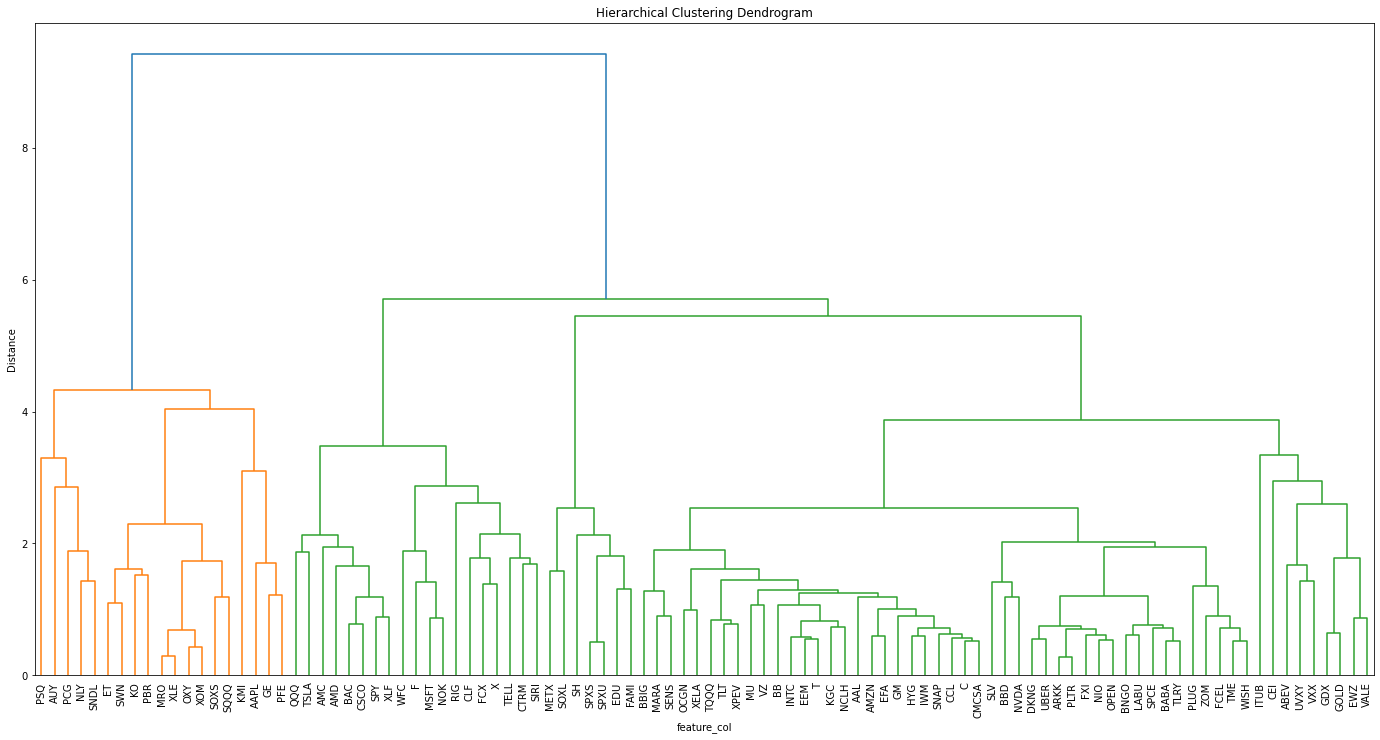

In [24]:
final_clusters = hierarchical_clustering_and_clusters(top100_symbols_df,'Date','Symbol','Price',threshold = 2.0)

#### Now we will pick random sample symbol from each cluster above for further analysis

In [25]:
import random

# Set a random seed for reproducibility
random.seed(123)

#initialize an empty list to store sample symbols
random_symbols =[]
for cluster, symbols in final_clusters.items():
    sample_symbols = random.choice(symbols)
    random_symbols.append(sample_symbols)
    
print(random_symbols)
len(random_symbols)

['NLY', 'AUY', 'PSQ', 'SWN', 'SOXS', 'AAPL', 'KMI', 'TSLA', 'SPY', 'NOK', 'FCX', 'CTRM', 'RIG', 'METX', 'SPXS', 'SH', 'TQQQ', 'BBD', 'FXI', 'ABEV', 'VALE', 'CEI', 'ITUB']


23

#### Create a new dataframe containing only the selected 23 symbols

In [26]:
selected_df = sorted_df[sorted_df['Symbol'].isin(random_symbols)]
print(selected_df.shape)
selected_df.head() 

(2415, 4)


Symbol   Price  Volume       Date
628     AAPL  132.69   97312 2021-01-01
9065    AAPL  132.05  101415 2021-01-08
17367   AAPL  127.14  104386 2021-01-15
24954   AAPL  139.07  111047 2021-01-22
32659   AAPL  131.96  173148 2021-01-29

### Exploratory Data Analysis(EDA)

In [27]:
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2415 entries, 628 to 958009
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Symbol  2415 non-null   object        
 1   Price   2415 non-null   float64       
 2   Volume  2415 non-null   int64         
 3   Date    2415 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 94.3+ KB


In [40]:
# get summary statistics by Symbol

# Set Pandas display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

selected_df.groupby('Symbol').describe()

Price                                                          \
        count        mean         std     min     25%     50%     75%   
Symbol                                                                  
AAPL    105.0  147.482000   15.481581  119.99  134.16  147.11  157.65   
ABEV    105.0    2.936381    0.259304    2.49    2.77    2.88    3.06   
AUY     105.0    4.730571    0.551473    3.89    4.30    4.67    5.12   
BBD     105.0    4.032476    0.645596    2.68    3.59    3.95    4.54   
CEI     105.0    0.800190    0.541014    0.08    0.43    0.69    1.05   
CTRM    105.0    1.573048    0.679631    0.18    1.14    1.57    2.00   
FCX     105.0   36.608381    5.644552   26.02   32.25   36.60   39.65   
FXI     105.0   37.374190    7.959627   21.54   30.42   37.65   44.40   
ITUB    105.0    5.034571    0.638719    3.70    4.58    5.06    5.51   
KMI     105.0   17.304762    1.322660   13.66   16.52   17.37   18.31   
METX    105.0    0.884667    0.787517    0.10    0.25    0.54    1.39   
NLY     105.0    9.418190    4.205684    5.65    7.06    8.39    8.90   
NOK     105.0    5.067048    0.648258    3.88    4.63    5.07    5.58   
PSQ     105.0   12.929619    1.164822   10.75   11.96   13.05   13.83   
RIG     105.0    3.638381    0.564048    2.31    3.31    3.59    4.00   
SH      105.0   15.500095    1.094479   13.62   14.72   15.35   16.03   
SOXS    105.0   23.500762   21.859812    3.42    6.26   10.42   40.14   
SPXS    105.0   23.110476    5.790145    3.68   20.04   22.18   25.87   
SPY     105.0  417.045619   30.570386  357.17  390.08  416.74  441.95   
SWN     105.0    5.591429    1.308880    2.98    4.66    5.21    6.58   
TQQQ    105.0   82.781619   52.772333   17.30   30.24   86.48  129.15   
TSLA    105.0  701.376952  267.791600  123.15  625.22  736.27  865.65   
VALE    105.0   16.690571    3.022825   11.45   14.20   16.70   19.06   

                Volume                                                  \
            max  count           mean            std      min      25%   
Symbol                                                                   
AAPL     179.45  105.0   90801.419048   30658.760322  50979.0  68356.0   
ABEV       3.87  105.0   25696.323810   11038.268175   3896.0  16973.0   
AUY        6.21  105.0   16653.152381   12150.774258   6198.0  11557.0   
BBD        5.55  105.0   32974.628571   14023.865017   8051.0  23944.0   
CEI        3.25  105.0   54176.723810  132807.397962   1594.0   8316.0   
CTRM       3.45  105.0   28862.980952   66474.298592    219.0    923.0   
FCX       51.93  105.0   18965.447619    7371.834467   6596.0  13799.0   
FXI       53.60  105.0   29067.695238   15162.327899   8317.0  18342.0   
ITUB       6.37  105.0   40482.638095   17006.233674   8204.0  30279.0   
KMI       19.94  105.0   15941.171429    6351.975755   6400.0  12138.0   
METX       3.05  105.0   20489.447619   71309.085175     72.0    343.0   
NLY       22.49  105.0   22020.552381   29510.771347   4387.0  11348.0   
NOK        6.22  105.0   32091.990476   35972.762543   9899.0  17617.0   
PSQ       15.25  105.0   16298.485714   12691.936566   1729.0   5534.0   
RIG        5.08  105.0   20250.704762   11746.157344   7902.0  12863.0   
SH        18.11  105.0   21698.409524   14976.161821   2689.0   7544.0   
SOXS      80.05  105.0   18968.476190   17875.710900   1865.0   7640.0   
SPXS      39.90  105.0   15860.190476    9820.290846   2621.0   7120.0   
SPY      474.96  105.0   85234.076190   30828.956576  33882.0  59850.0   
SWN        9.35  105.0   25586.523810   20689.024374   8295.0  14782.0   
TQQQ     190.28  105.0  101533.076190   84714.511095  13151.0  31209.0   
TSLA    1222.09  105.0   38571.504762   30153.041479  11665.0  21459.0   
VALE      22.68  105.0   32893.933333   14138.491849   8219.0  23144.0   

                                     
            50%       75%       max  
Symbol                               
AAPL    81352.0  104386.0  184601.0  
ABEV    23835.0   33415.0   6214

From above, we can observe that TSLA, SPY and AAPL have the top three highest average stock price. TSLA has the highest price of 701 whereas CEI has the lowest price of 0.81.
Looking at the trading volume column, we see that TQQQ has the highest average trading volume followed by AAPL. Price and volume counts are both 105 indicating there are no missing values and rows. 

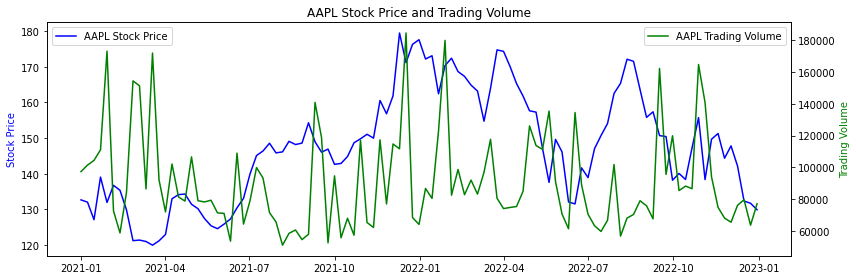

Correlation between Price and Volume for Symbol AAPL: -0.04


<Figure size 1080x576 with 0 Axes>

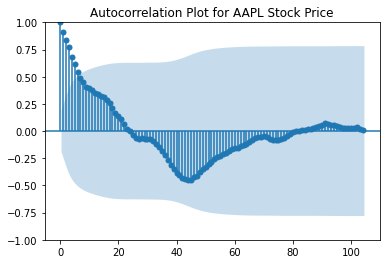

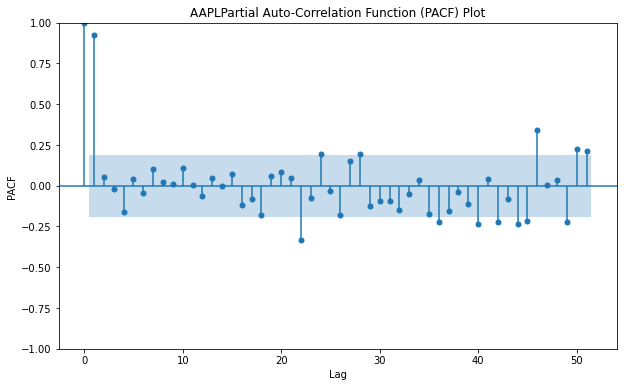

ADF Statistic: -4.825722729310909
P-Value: 4.854760235706611e-05
Number of Lags: 2
Number of Observations: 101
Critical Values: {'1%': -3.4968181663902103, '5%': -2.8906107514600103, '10%': -2.5822770483285953}
The time series for AAPL Stock is stationary.


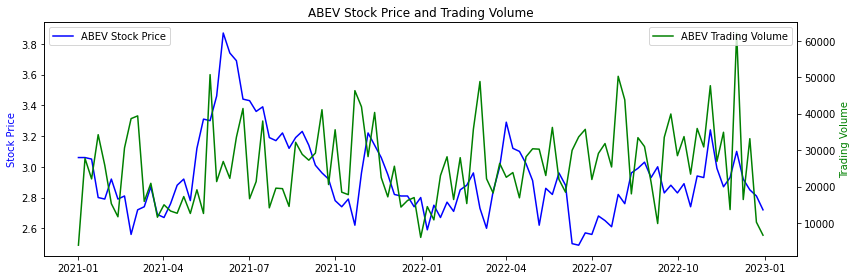

Correlation between Price and Volume for Symbol ABEV: 0.06


<Figure size 1080x576 with 0 Axes>

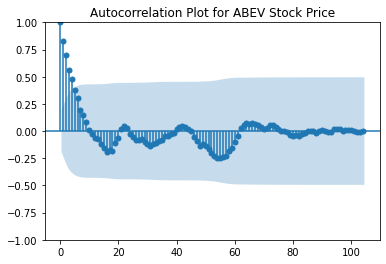

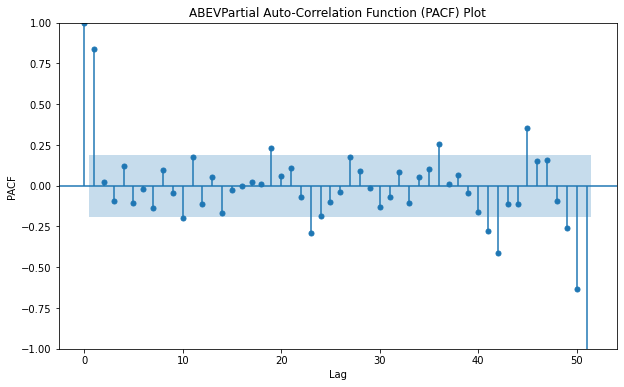

ADF Statistic: -11.071113964807852
P-Value: 4.5510380362624574e-20
Number of Lags: 0
Number of Observations: 103
Critical Values: {'1%': -3.4954932834550623, '5%': -2.8900369024285117, '10%': -2.5819706975209726}
The time series for ABEV Stock is stationary.


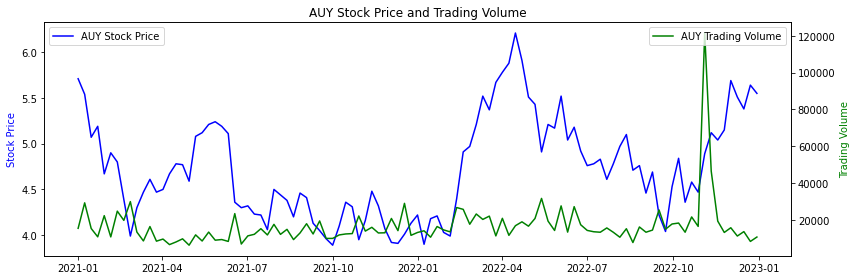

Correlation between Price and Volume for Symbol AUY: 0.08


<Figure size 1080x576 with 0 Axes>

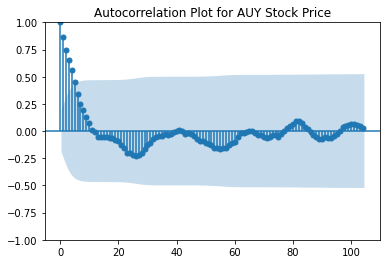

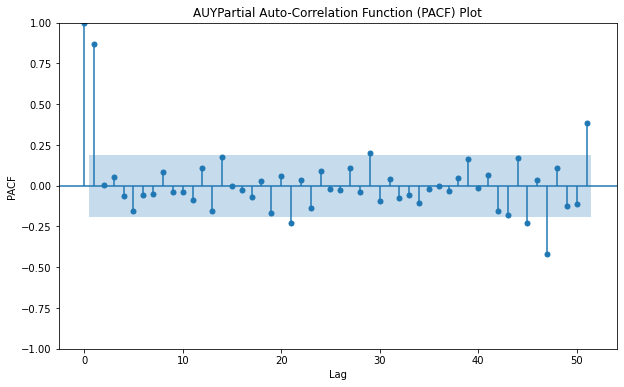

ADF Statistic: -10.878512527658842
P-Value: 1.312857922864328e-19
Number of Lags: 0
Number of Observations: 103
Critical Values: {'1%': -3.4954932834550623, '5%': -2.8900369024285117, '10%': -2.5819706975209726}
The time series for AUY Stock is stationary.


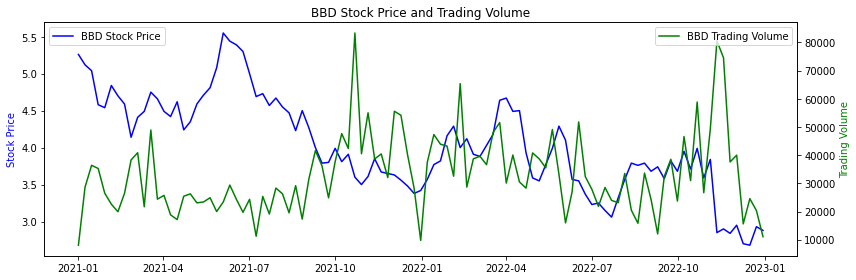

Correlation between Price and Volume for Symbol BBD: -0.28


<Figure size 1080x576 with 0 Axes>

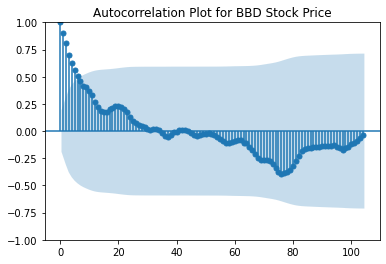

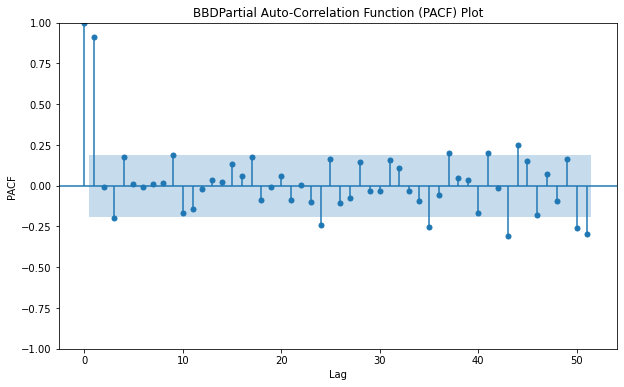

ADF Statistic: -5.589180284426214
P-Value: 1.3412499314795241e-06
Number of Lags: 4
Number of Observations: 99
Critical Values: {'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}
The time series for BBD Stock is stationary.


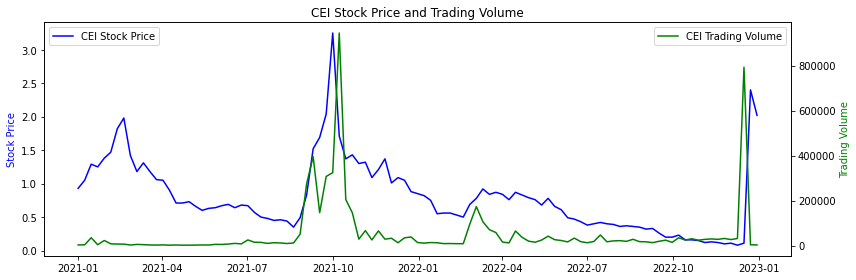

Correlation between Price and Volume for Symbol CEI: 0.25


<Figure size 1080x576 with 0 Axes>

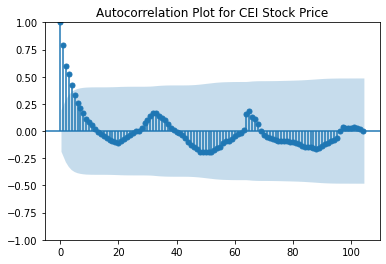

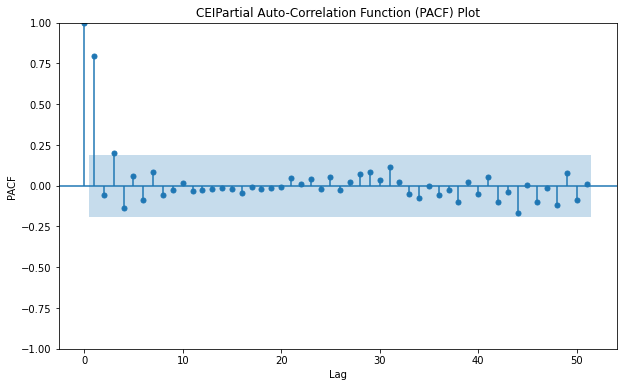

ADF Statistic: -11.143897639450849
P-Value: 3.059900922597265e-20
Number of Lags: 0
Number of Observations: 103
Critical Values: {'1%': -3.4954932834550623, '5%': -2.8900369024285117, '10%': -2.5819706975209726}
The time series for CEI Stock is stationary.


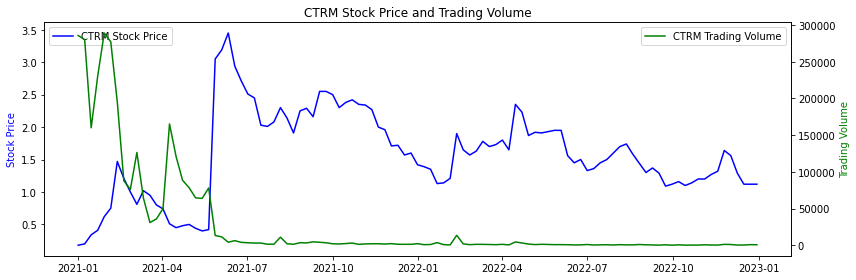

Correlation between Price and Volume for Symbol CTRM: -0.57


<Figure size 1080x576 with 0 Axes>

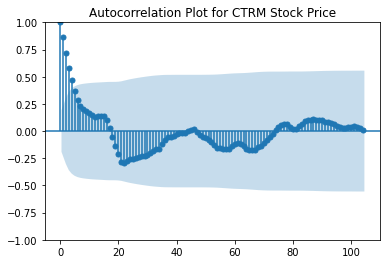

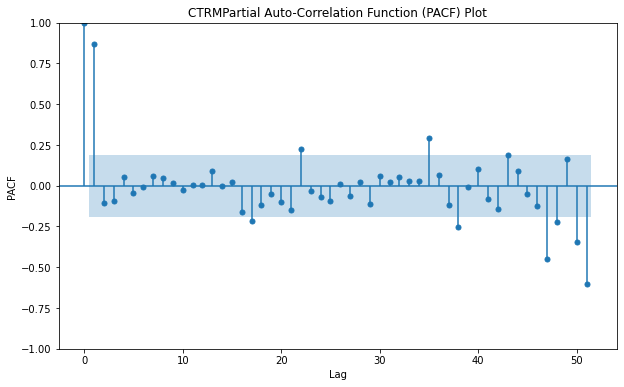

ADF Statistic: -9.728346066692543
P-Value: 9.14538225583726e-17
Number of Lags: 0
Number of Observations: 103
Critical Values: {'1%': -3.4954932834550623, '5%': -2.8900369024285117, '10%': -2.5819706975209726}
The time series for CTRM Stock is stationary.


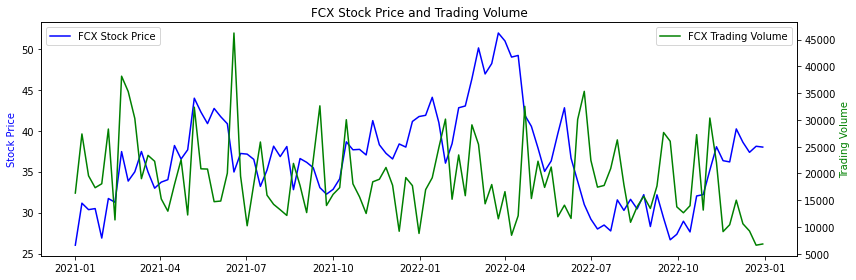

Correlation between Price and Volume for Symbol FCX: -0.11


<Figure size 1080x576 with 0 Axes>

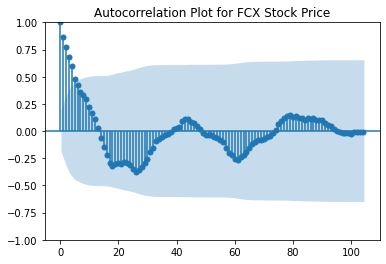

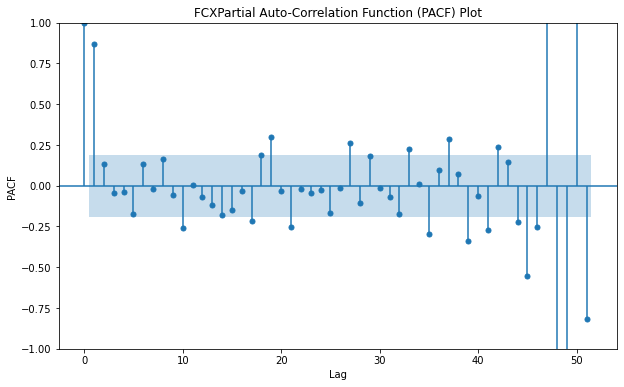

ADF Statistic: -11.761659653429575
P-Value: 1.144151892056678e-21
Number of Lags: 0
Number of Observations: 103
Critical Values: {'1%': -3.4954932834550623, '5%': -2.8900369024285117, '10%': -2.5819706975209726}
The time series for FCX Stock is stationary.


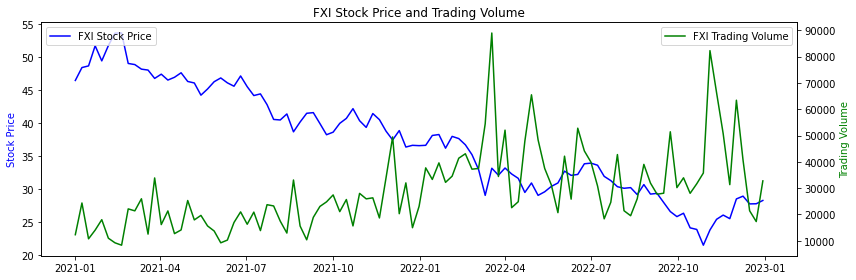

Correlation between Price and Volume for Symbol FXI: -0.61


<Figure size 1080x576 with 0 Axes>

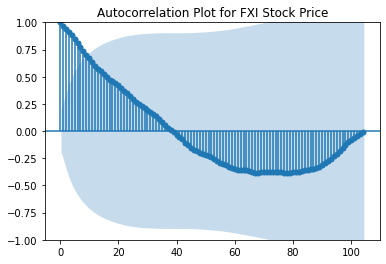

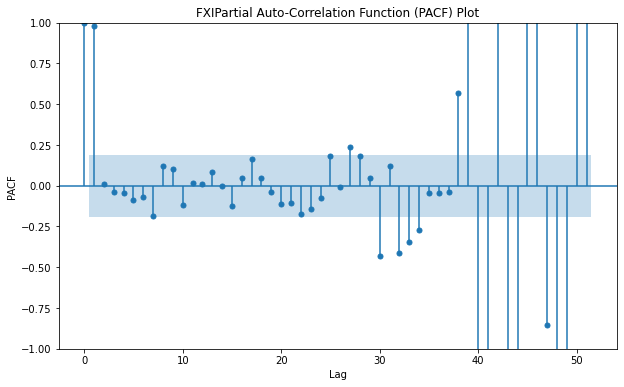

ADF Statistic: -11.742290256488763
P-Value: 1.2652628266391757e-21
Number of Lags: 0
Number of Observations: 103
Critical Values: {'1%': -3.4954932834550623, '5%': -2.8900369024285117, '10%': -2.5819706975209726}
The time series for FXI Stock is stationary.


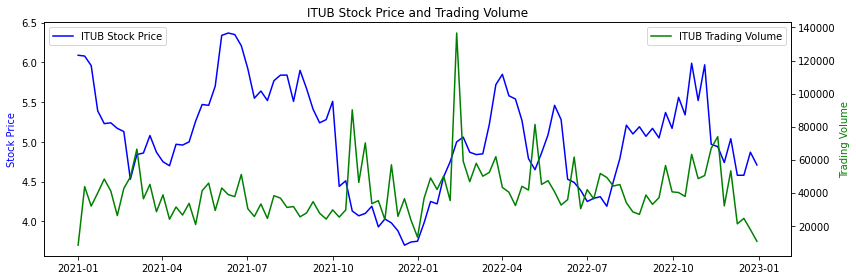

Correlation between Price and Volume for Symbol ITUB: -0.06


<Figure size 1080x576 with 0 Axes>

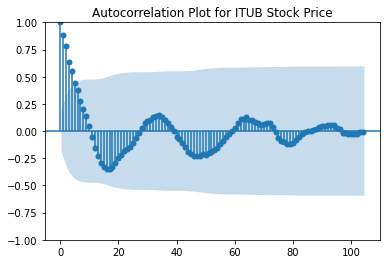

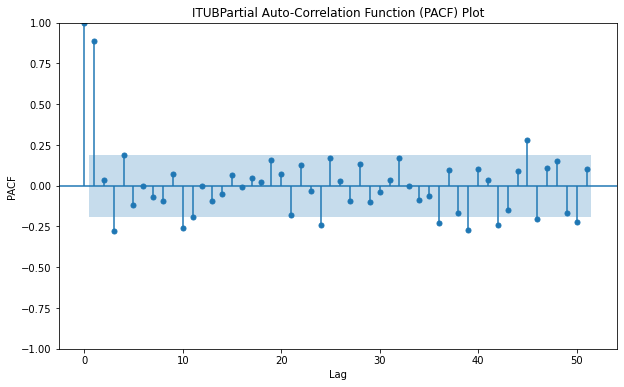

ADF Statistic: -6.316257046928331
P-Value: 3.14519070225689e-08
Number of Lags: 2
Number of Observations: 101
Critical Values: {'1%': -3.4968181663902103, '5%': -2.8906107514600103, '10%': -2.5822770483285953}
The time series for ITUB Stock is stationary.


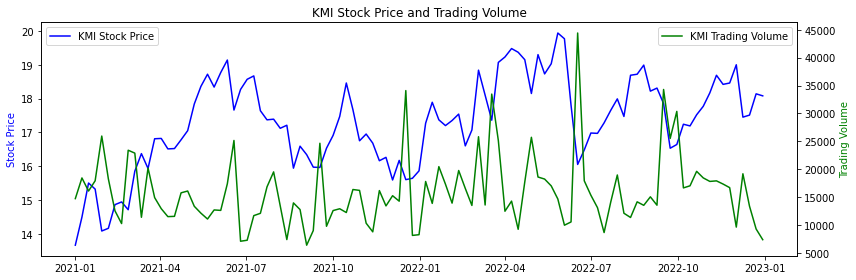

Correlation between Price and Volume for Symbol KMI: -0.15


<Figure size 1080x576 with 0 Axes>

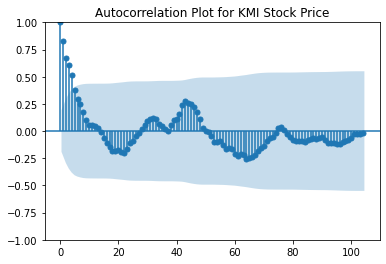

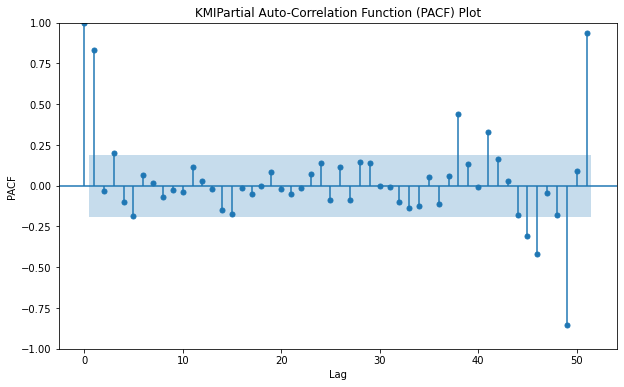

ADF Statistic: -9.363047266685207
P-Value: 7.730348483647728e-16
Number of Lags: 1
Number of Observations: 102
Critical Values: {'1%': -3.4961490537199116, '5%': -2.8903209639580556, '10%': -2.5821223452518263}
The time series for KMI Stock is stationary.


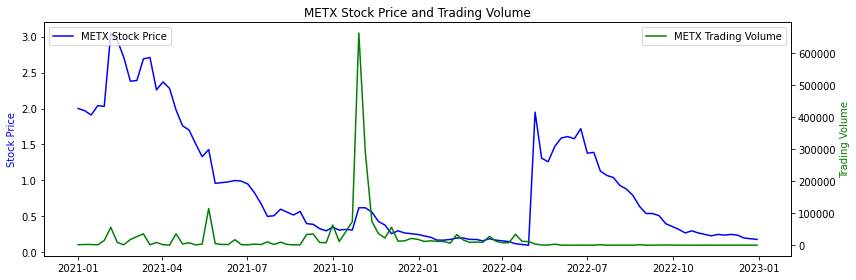

Correlation between Price and Volume for Symbol METX: -0.05


<Figure size 1080x576 with 0 Axes>

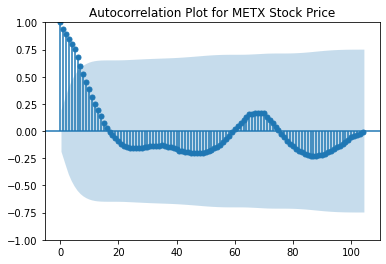

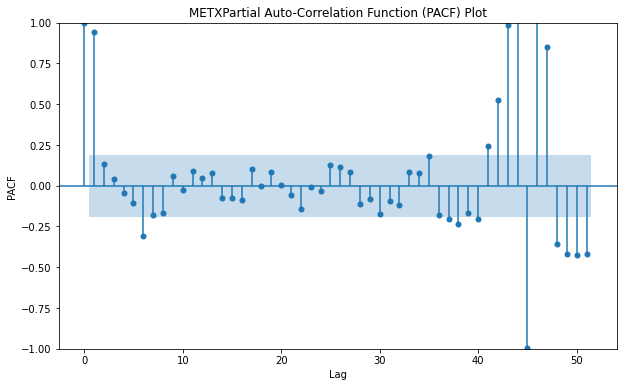

ADF Statistic: -11.99302778981101
P-Value: 3.485226107036074e-22
Number of Lags: 0
Number of Observations: 103
Critical Values: {'1%': -3.4954932834550623, '5%': -2.8900369024285117, '10%': -2.5819706975209726}
The time series for METX Stock is stationary.


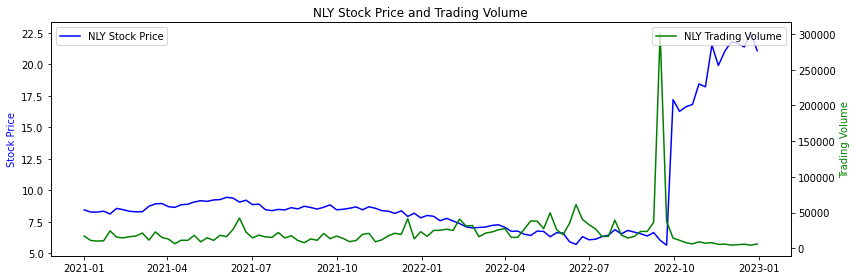

Correlation between Price and Volume for Symbol NLY: -0.28


<Figure size 1080x576 with 0 Axes>

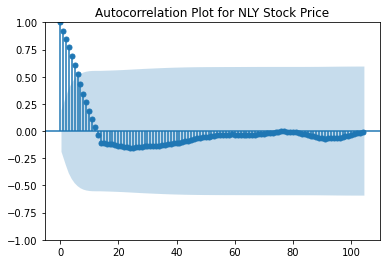

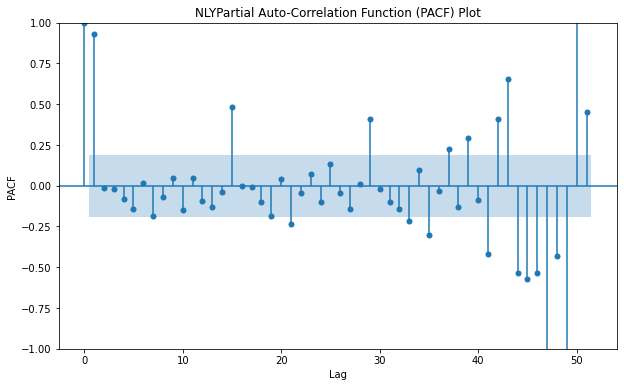

ADF Statistic: -11.905882109699165
P-Value: 5.437814004401417e-22
Number of Lags: 0
Number of Observations: 103
Critical Values: {'1%': -3.4954932834550623, '5%': -2.8900369024285117, '10%': -2.5819706975209726}
The time series for NLY Stock is stationary.


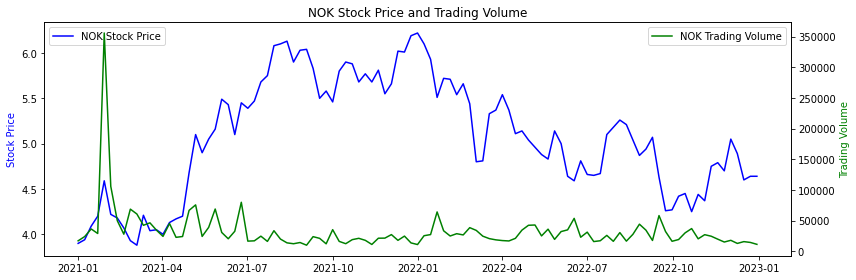

Correlation between Price and Volume for Symbol NOK: -0.22


<Figure size 1080x576 with 0 Axes>

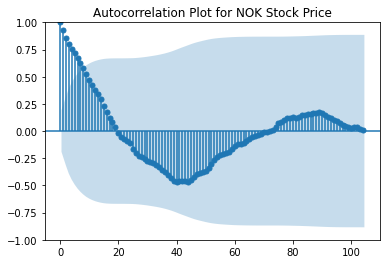

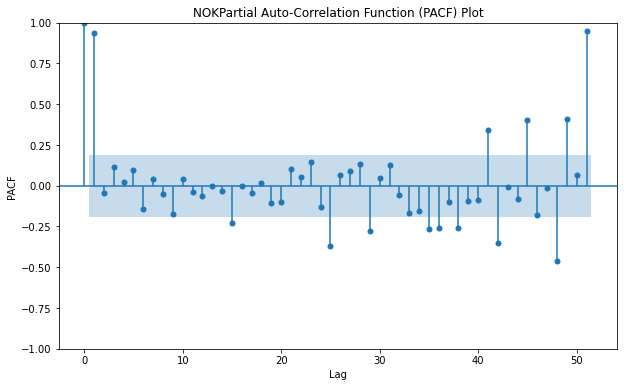

ADF Statistic: -8.119366362281577
P-Value: 1.1672998066604774e-12
Number of Lags: 1
Number of Observations: 102
Critical Values: {'1%': -3.4961490537199116, '5%': -2.8903209639580556, '10%': -2.5821223452518263}
The time series for NOK Stock is stationary.


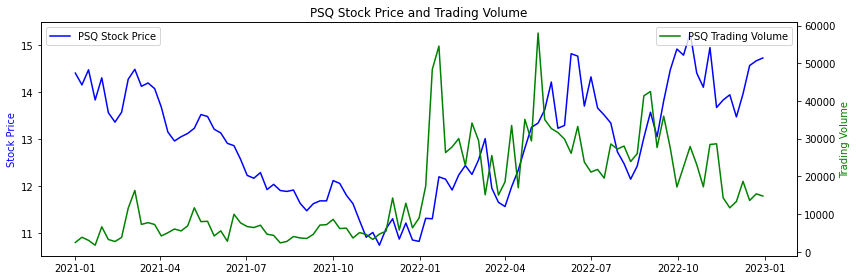

Correlation between Price and Volume for Symbol PSQ: 0.19


<Figure size 1080x576 with 0 Axes>

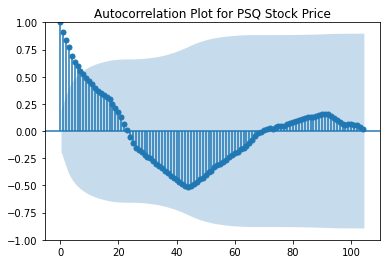

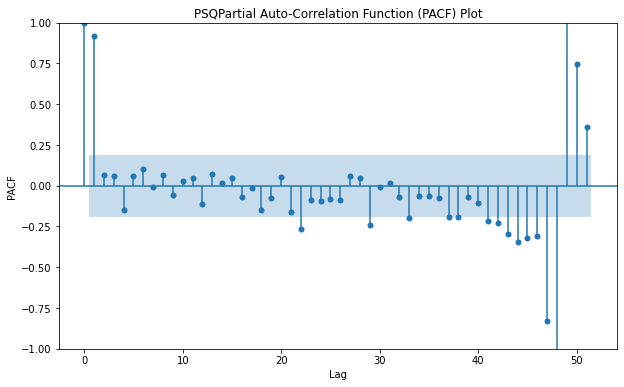

ADF Statistic: -5.07523226415869
P-Value: 1.571895137088868e-05
Number of Lags: 2
Number of Observations: 101
Critical Values: {'1%': -3.4968181663902103, '5%': -2.8906107514600103, '10%': -2.5822770483285953}
The time series for PSQ Stock is stationary.


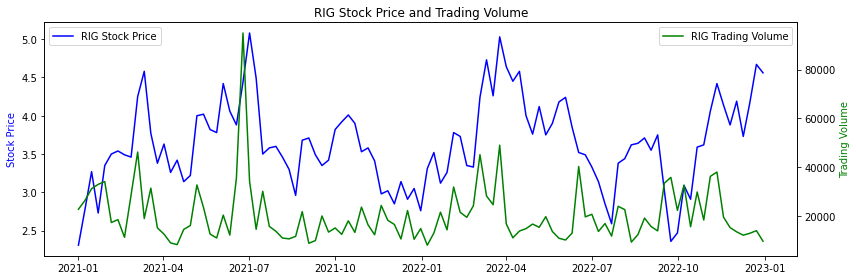

Correlation between Price and Volume for Symbol RIG: 0.16


<Figure size 1080x576 with 0 Axes>

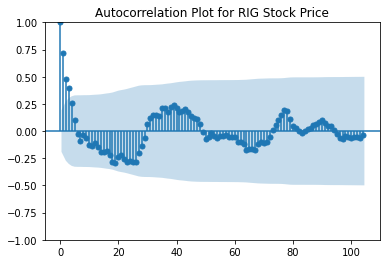

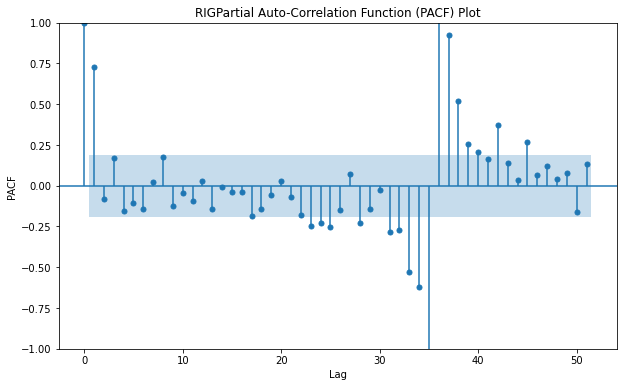

ADF Statistic: -5.915177089827494
P-Value: 2.582942793926797e-07
Number of Lags: 6
Number of Observations: 97
Critical Values: {'1%': -3.4996365338407074, '5%': -2.8918307730370025, '10%': -2.5829283377617176}
The time series for RIG Stock is stationary.


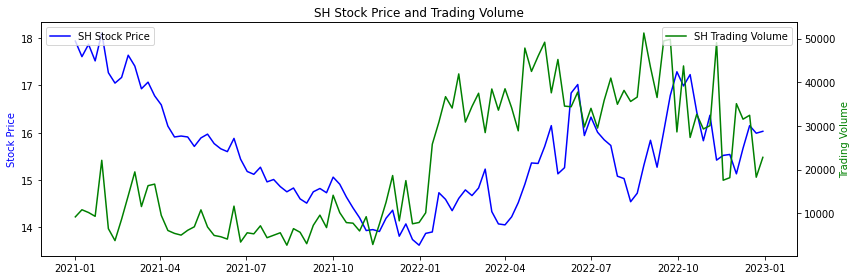

Correlation between Price and Volume for Symbol SH: 0.02


<Figure size 1080x576 with 0 Axes>

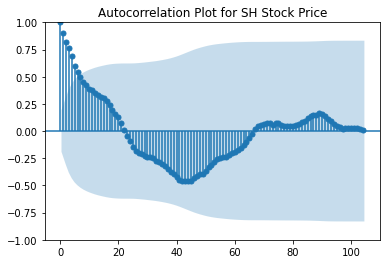

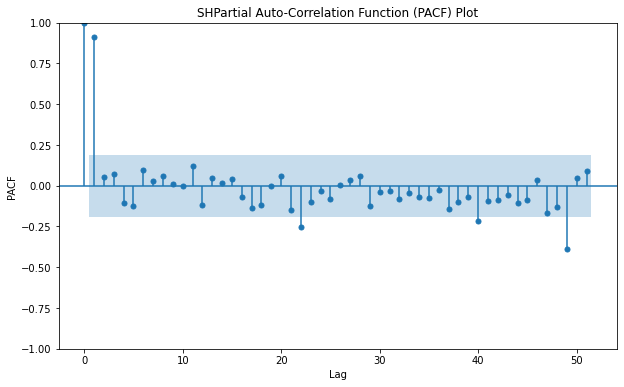

ADF Statistic: -5.676213322942021
P-Value: 8.692914771330354e-07
Number of Lags: 2
Number of Observations: 101
Critical Values: {'1%': -3.4968181663902103, '5%': -2.8906107514600103, '10%': -2.5822770483285953}
The time series for SH Stock is stationary.


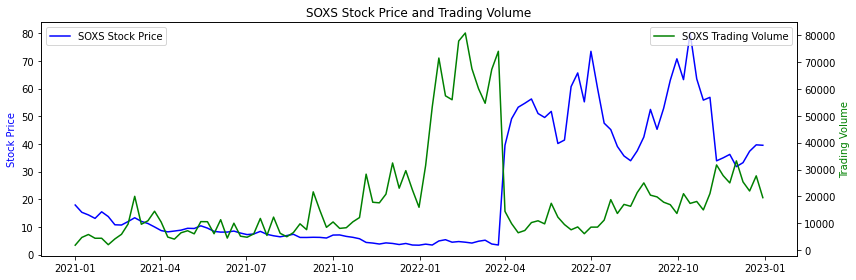

Correlation between Price and Volume for Symbol SOXS: -0.21


<Figure size 1080x576 with 0 Axes>

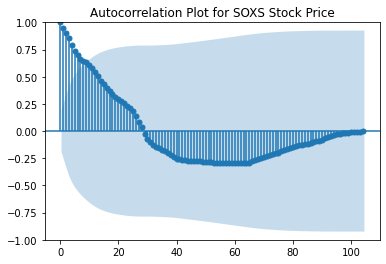

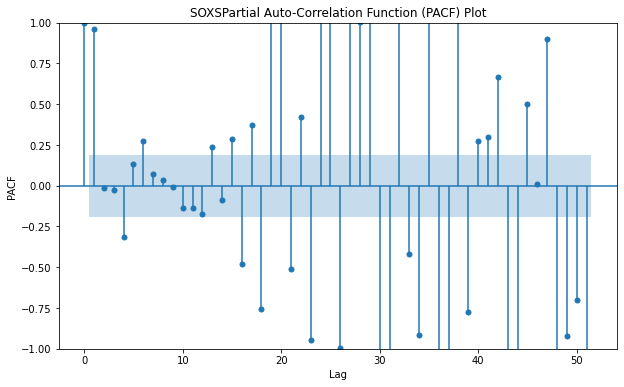

ADF Statistic: -5.428074736718855
P-Value: 2.9564001545465617e-06
Number of Lags: 4
Number of Observations: 99
Critical Values: {'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}
The time series for SOXS Stock is stationary.


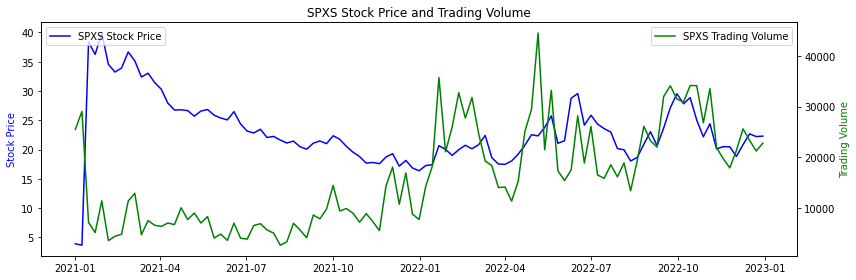

Correlation between Price and Volume for Symbol SPXS: -0.21


<Figure size 1080x576 with 0 Axes>

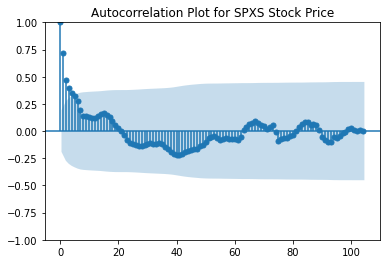

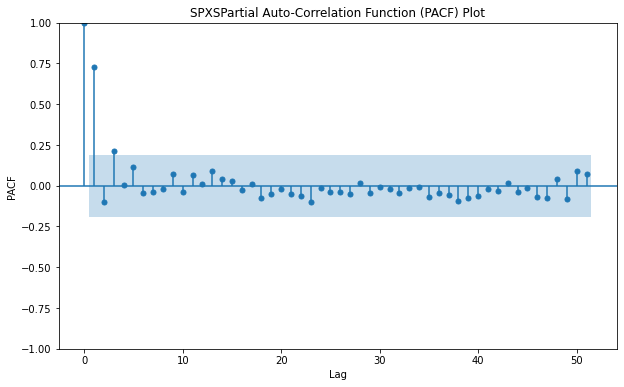

ADF Statistic: -8.916518599079081
P-Value: 1.0690635532113362e-14
Number of Lags: 2
Number of Observations: 101
Critical Values: {'1%': -3.4968181663902103, '5%': -2.8906107514600103, '10%': -2.5822770483285953}
The time series for SPXS Stock is stationary.


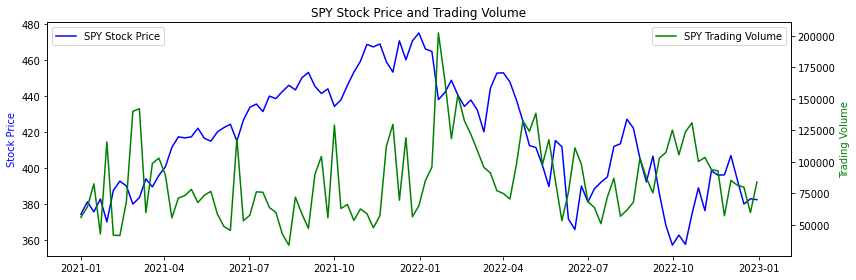

Correlation between Price and Volume for Symbol SPY: -0.14


<Figure size 1080x576 with 0 Axes>

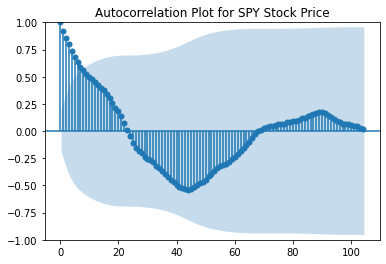

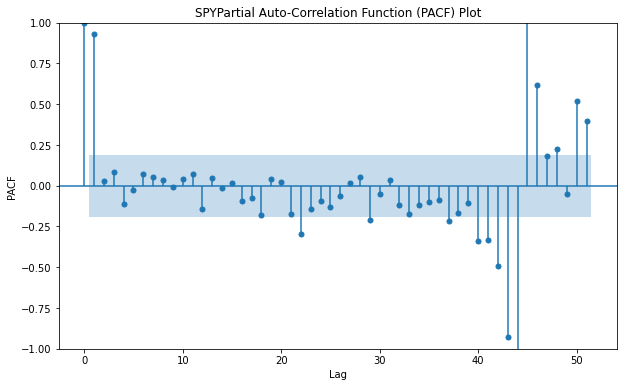

ADF Statistic: -5.495876858043881
P-Value: 2.1240915008137177e-06
Number of Lags: 2
Number of Observations: 101
Critical Values: {'1%': -3.4968181663902103, '5%': -2.8906107514600103, '10%': -2.5822770483285953}
The time series for SPY Stock is stationary.


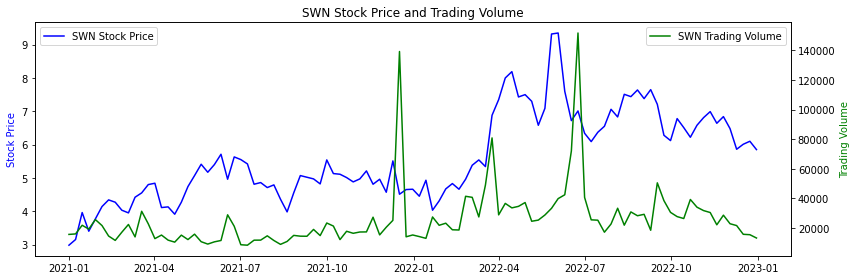

Correlation between Price and Volume for Symbol SWN: 0.33


<Figure size 1080x576 with 0 Axes>

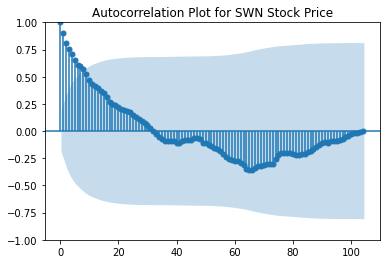

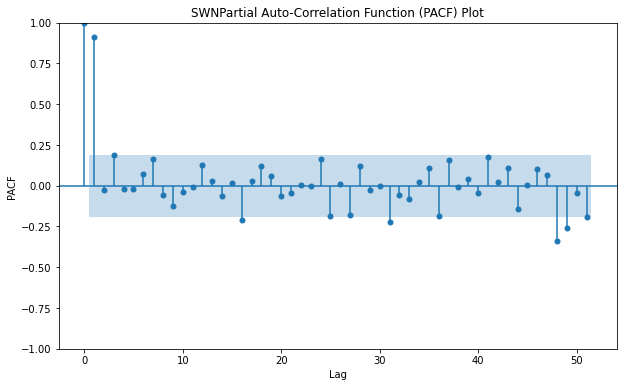

ADF Statistic: -8.662564405849668
P-Value: 4.7786297883802664e-14
Number of Lags: 1
Number of Observations: 102
Critical Values: {'1%': -3.4961490537199116, '5%': -2.8903209639580556, '10%': -2.5821223452518263}
The time series for SWN Stock is stationary.


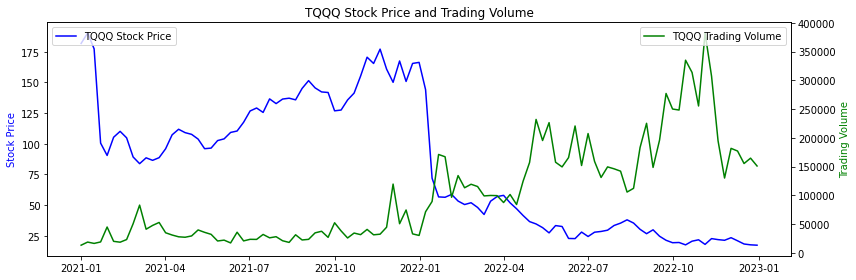

Correlation between Price and Volume for Symbol TQQQ: -0.81


<Figure size 1080x576 with 0 Axes>

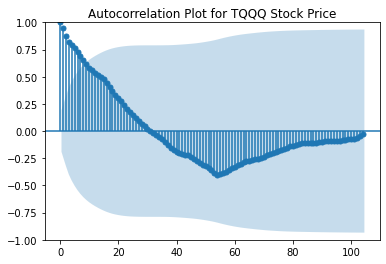

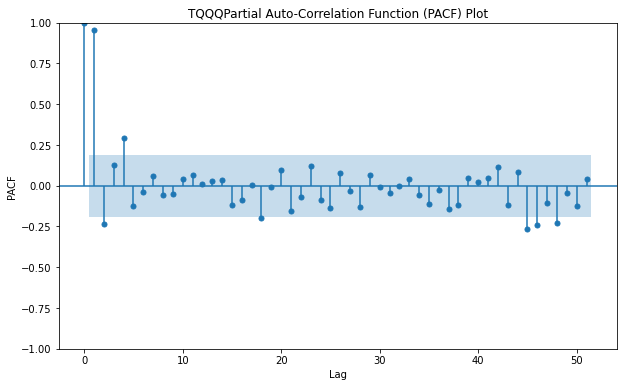

ADF Statistic: -7.9094494724061795
P-Value: 3.984243810211389e-12
Number of Lags: 0
Number of Observations: 103
Critical Values: {'1%': -3.4954932834550623, '5%': -2.8900369024285117, '10%': -2.5819706975209726}
The time series for TQQQ Stock is stationary.


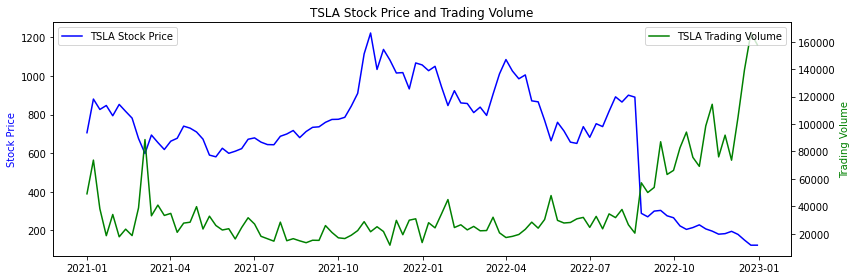

Correlation between Price and Volume for Symbol TSLA: -0.76


<Figure size 1080x576 with 0 Axes>

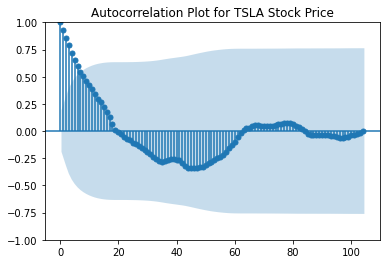

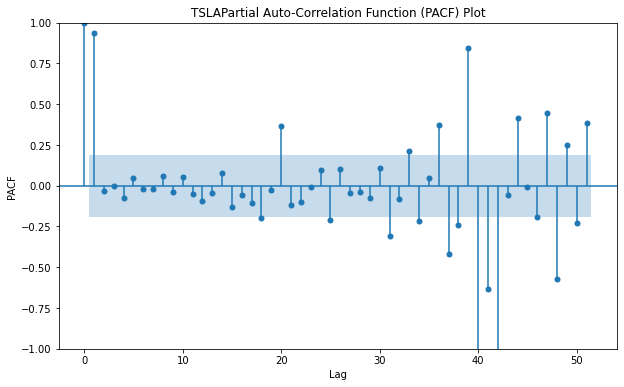

ADF Statistic: -10.505497942164133
P-Value: 1.0569133010123977e-18
Number of Lags: 0
Number of Observations: 103
Critical Values: {'1%': -3.4954932834550623, '5%': -2.8900369024285117, '10%': -2.5819706975209726}
The time series for TSLA Stock is stationary.


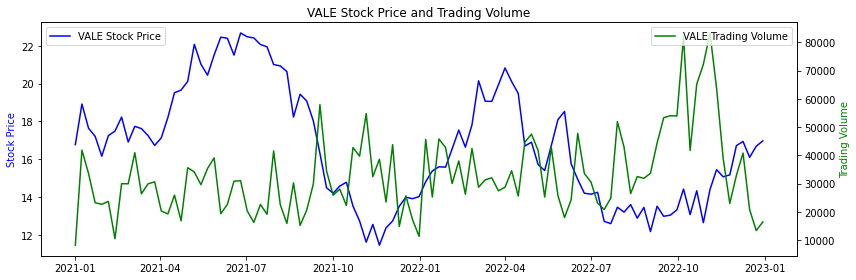

Correlation between Price and Volume for Symbol VALE: -0.35


<Figure size 1080x576 with 0 Axes>

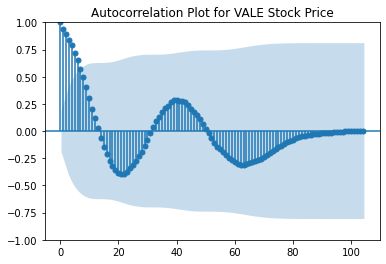

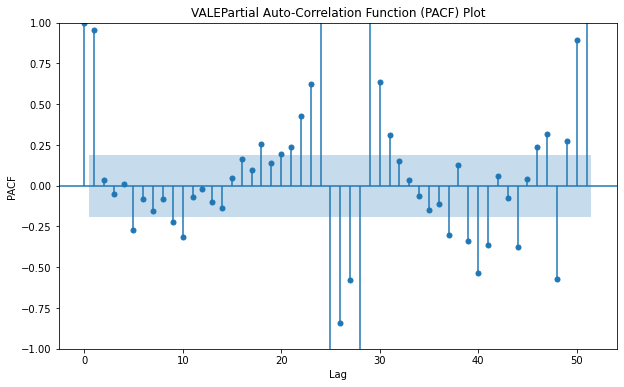

ADF Statistic: -10.892640709259817
P-Value: 1.2141743505022144e-19
Number of Lags: 0
Number of Observations: 103
Critical Values: {'1%': -3.4954932834550623, '5%': -2.8900369024285117, '10%': -2.5819706975209726}
The time series for VALE Stock is stationary.


In [41]:
# Looking at the time series and histogram plots and correlation between Price and volume

symbols= selected_df.groupby('Symbol')


for symbol, df in symbols:
    # Create a new figure for each symbol
    plt.figure(figsize=(12, 4))

    # Plot the stock price time series
    plt.subplot(1, 1, 1)
    plt.plot(df['Date'],df['Price'], label=f'{symbol} Stock Price', color='b')
    plt.ylabel('Stock Price', color='b')
    plt.title(f'{symbol} Stock Price and Trading Volume')
    plt.legend(loc='upper left')

    # Plot the trading volume time series
    plt.twinx()
    plt.plot(df['Date'],df['Volume'], label=f'{symbol} Trading Volume', color='g')
    plt.ylabel('Trading Volume', color='g')
    plt.legend(loc='upper right')
    
    # Adjust subplot layout and display the plot
    plt.tight_layout()
    plt.show()    
    
    # get price and volume correlation
    correlation = df['Price'].corr(df['Volume'])
    print(f'Correlation between Price and Volume for Symbol {symbol}: {correlation:.2f}')
    
    # Plot ACF 
    plt.figure(figsize=(15, 8))
    plot_acf(df['Price'], lags=104)
    plt.title(f'Autocorrelation Plot for {symbol} Stock Price')
    
    # Plot PACF
    fig, ax = plt.subplots(figsize=(10, 6))
    plot_pacf(df['Price'], lags=51, ax=ax)
    plt.title(f'{symbol}Partial Auto-Correlation Function (PACF) Plot')
    plt.xlabel('Lag')
    plt.ylabel('PACF')
    plt.show()
    
    #Run ADF(Augmented Dickey-Fuller) Test
    
    df['price_diff'] = df['Price'].diff()
    df = df.replace([np.inf, -np.inf, np.nan], np.nan).dropna()
    result = adfuller(df['price_diff'])
    # Extract and print the ADF test results
    adf_statistic, p_value, lags, nobs, critical_values, icbest = result
    print(f'ADF Statistic: {adf_statistic}')
    print(f'P-Value: {p_value}')
    print(f'Number of Lags: {lags}')
    print(f'Number of Observations: {nobs}')
    print(f'Critical Values: {critical_values}')

    # Interpret the results
    if p_value < 0.05:
        print(f'The time series for {symbol} Stock is stationary.')
    else:
        print(f'The time series for {symbol} Stock is non-stationary.')


ACF: The first 7 lags for all symbols have spikes above the blue shaded region. These spikes suggest a strong positive correlation between the current data and the values from the previous one to seven weeks. It also suggests a presence of weekly seasonality. 
PACF: A spike above blue shaded area at lag1 indicates strong significant partial autocorrelation or there is a direct relationship between current value and the value one step back. This indicates a presence of AR(1) term in our time series model. 

## Data splitting

When dealing with time series data, it is recommended to use the more recent data for testing and the older data for training.

In [42]:
# define a function to split data for each symbol group
def split_data(group, test_size=0.2):
    #Sort the data by date
    group = group.sort_values(by='Date')
    
    #Calculate the split index
    split_index = int(len(group)*(1-test_size))
    
    #Split the data into training and testing sets
    train_data = group.iloc[:split_index] 
    test_data = group.iloc[split_index:]
    return train_data, test_data

In [43]:
#Initialize a dictionary to store train and test data
train_test_data_dict = {}

#Iterate through random symbols to get train_test_data for each symbol
for symbol, group in selected_df.groupby('Symbol'):
    train_data, test_data = split_data(group)
    train_test_data_dict[symbol] = (train_data, test_data)
    train_shape = train_data.shape
    test_shape = test_data.shape

    print(f"Train data shape for {symbol}: {train_shape}")
    print(f"Test data shape for {symbol}: {test_shape}")

Train data shape for AAPL: (84, 4)
Test data shape for AAPL: (21, 4)
Train data shape for ABEV: (84, 4)
Test data shape for ABEV: (21, 4)
Train data shape for AUY: (84, 4)
Test data shape for AUY: (21, 4)
Train data shape for BBD: (84, 4)
Test data shape for BBD: (21, 4)
Train data shape for CEI: (84, 4)
Test data shape for CEI: (21, 4)
Train data shape for CTRM: (84, 4)
Test data shape for CTRM: (21, 4)
Train data shape for FCX: (84, 4)
Test data shape for FCX: (21, 4)
Train data shape for FXI: (84, 4)
Test data shape for FXI: (21, 4)
Train data shape for ITUB: (84, 4)
Test data shape for ITUB: (21, 4)
Train data shape for KMI: (84, 4)
Test data shape for KMI: (21, 4)
Train data shape for METX: (84, 4)
Test data shape for METX: (21, 4)
Train data shape for NLY: (84, 4)
Test data shape for NLY: (21, 4)
Train data shape for NOK: (84, 4)
Test data shape for NOK: (21, 4)
Train data shape for PSQ: (84, 4)
Test data shape for PSQ: (21, 4)
Train data shape for RIG: (84, 4)
Test data shape fo

All the data are evenly split. There are 105 total rows for each symbol where 84 of them are in our training set and 21 of them in our testing set. 

Visualizing the train and test data split.

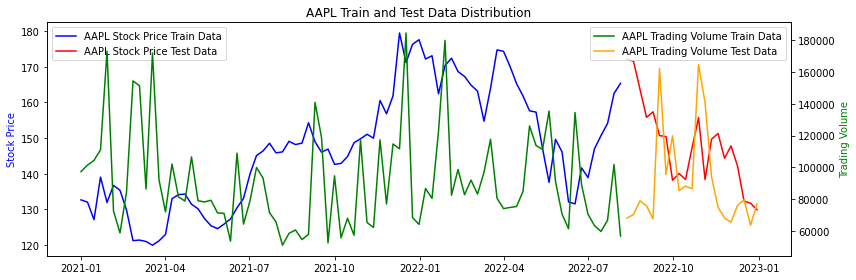

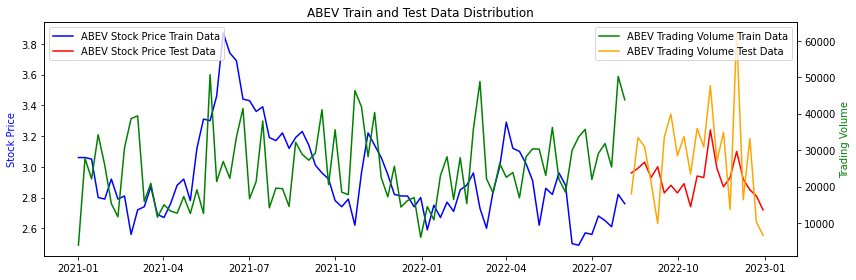

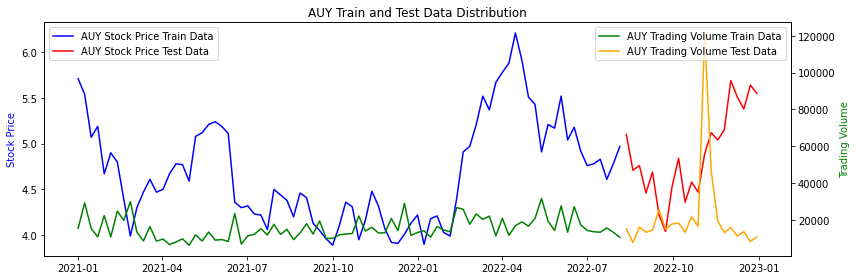

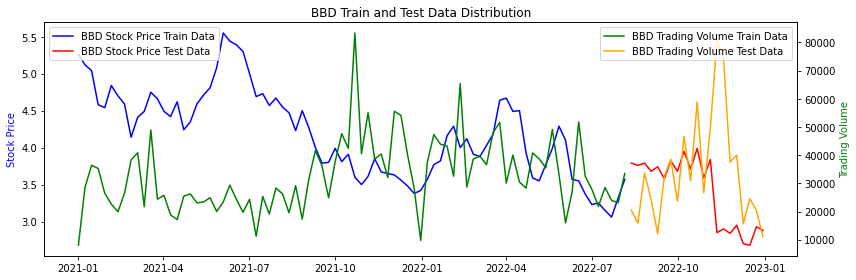

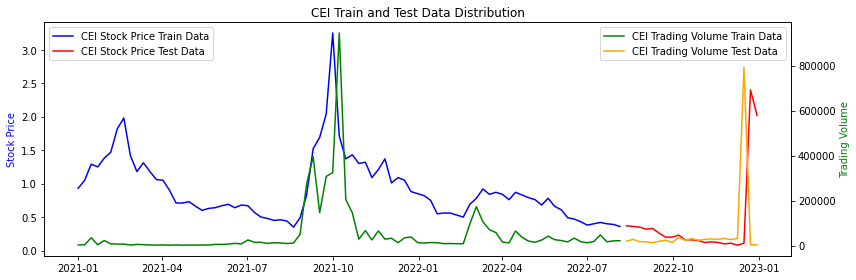

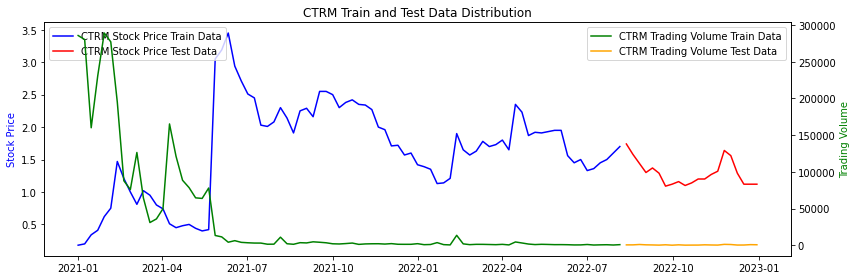

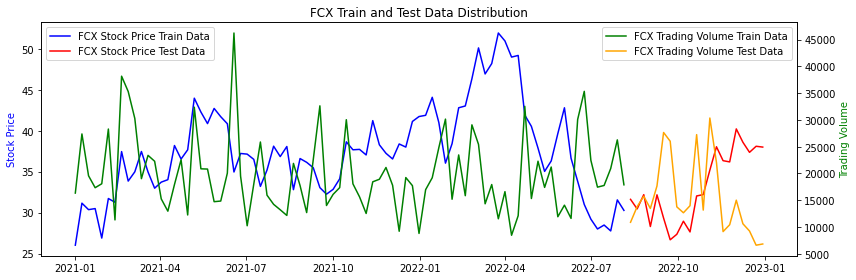

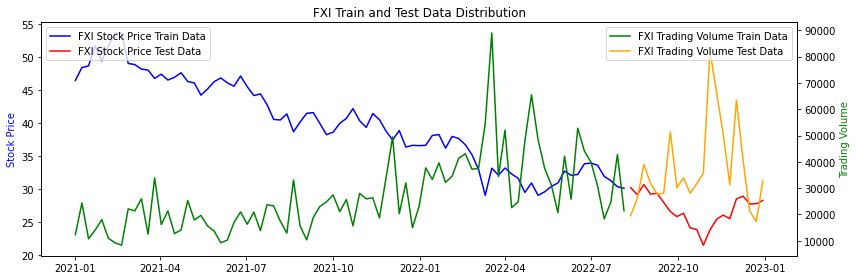

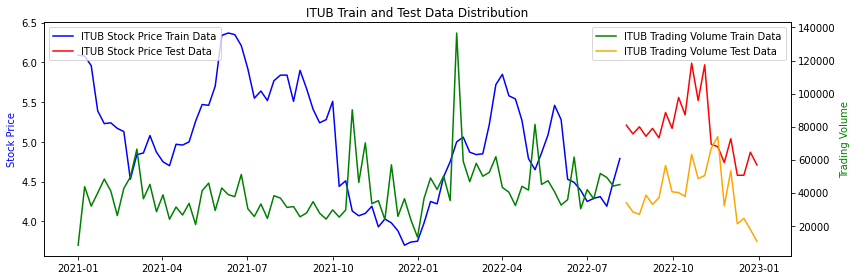

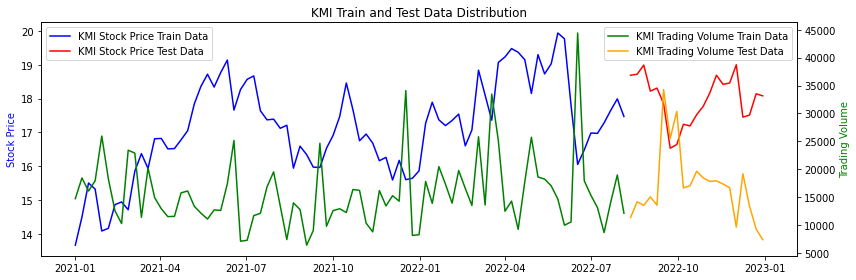

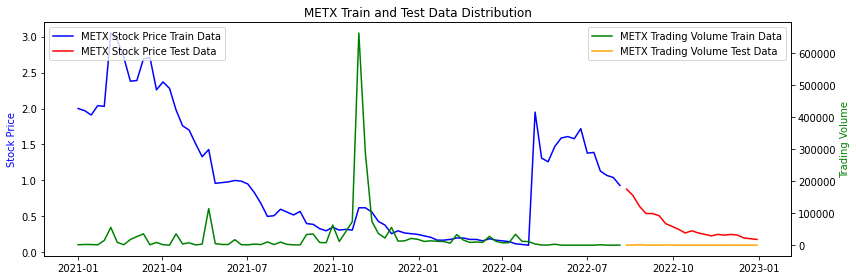

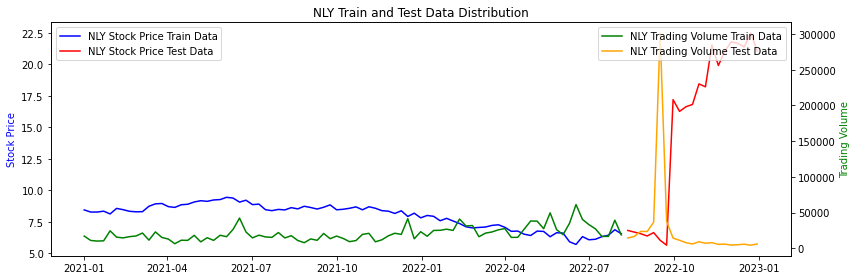

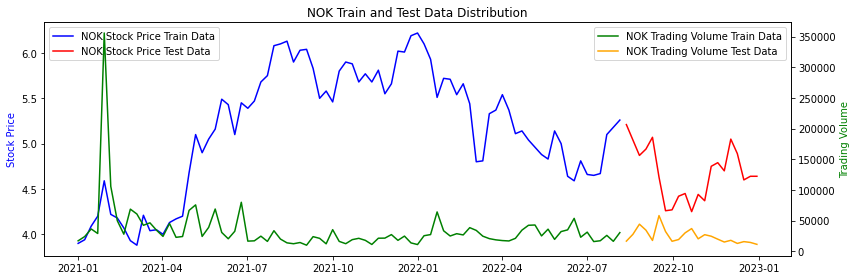

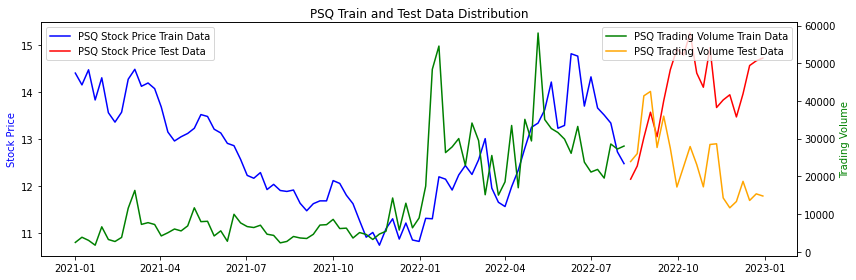

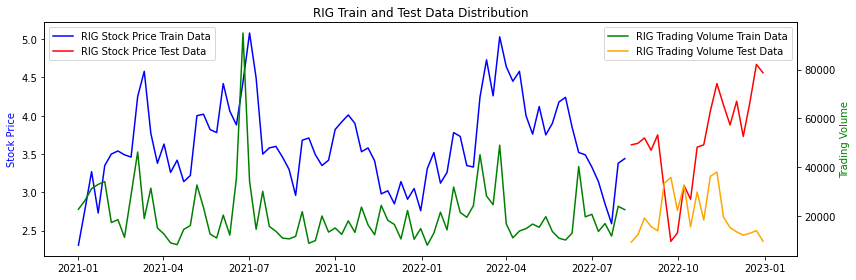

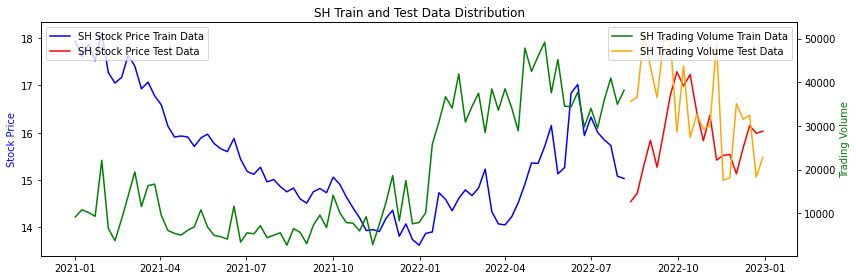

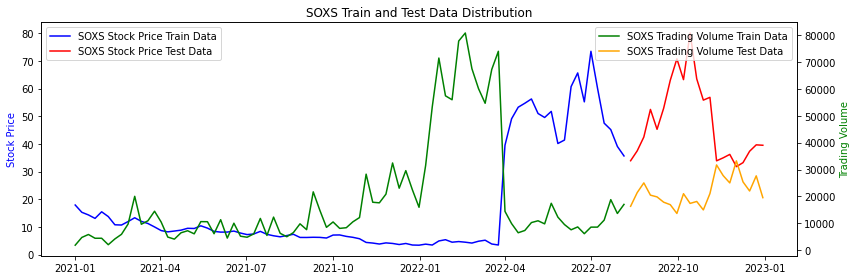

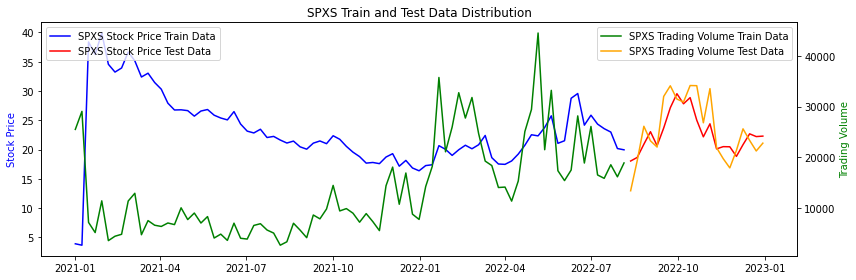

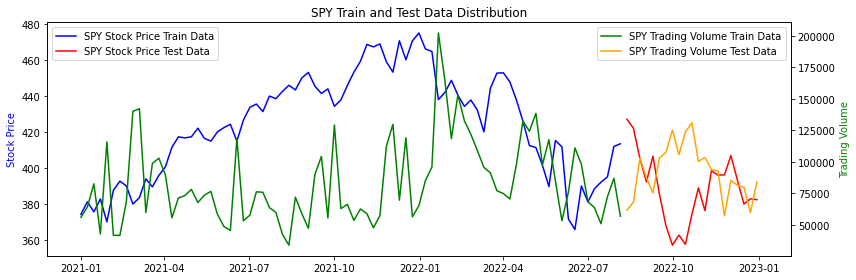

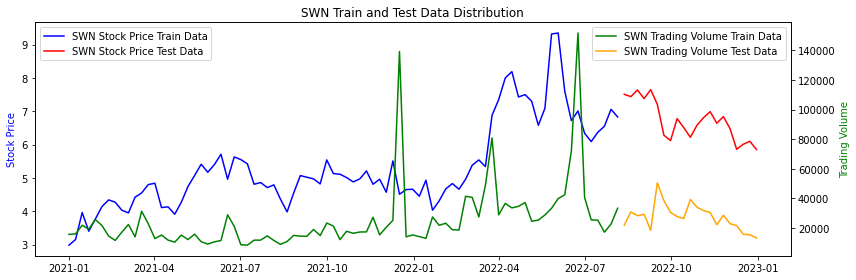

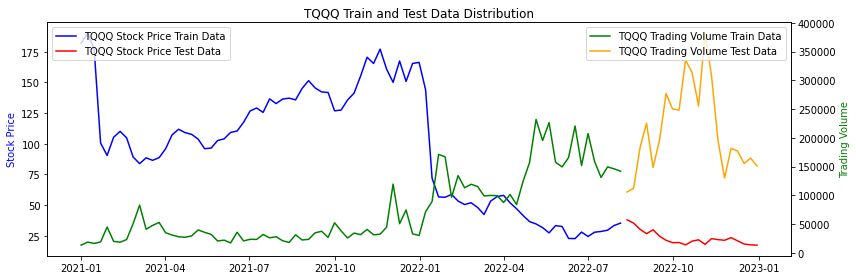

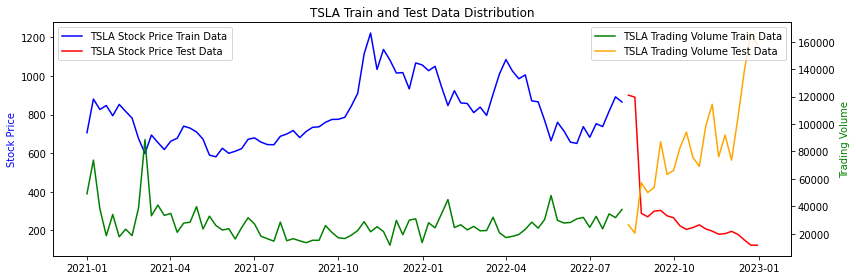

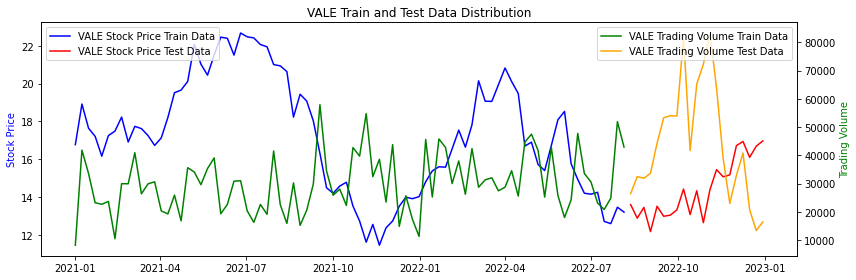

In [44]:
for symbol, (train_data, test_data) in train_test_data_dict.items():
    # Create a figure with two y-axes
    fig, ax1 = plt.subplots(figsize=(12, 4))

    # Plot the train_data for price on the first y-axis (blue)
    ax1.plot(train_data['Date'], train_data['Price'], label=f'{symbol} Stock Price Train Data', color='b')
    ax1.plot(test_data['Date'], test_data['Price'], label=f'{symbol} Stock Price Test Data', color='r')
    ax1.set_ylabel('Stock Price', color='b')

    # Create a second y-axis on the right side for 'Volume' (green)
    ax2 = ax1.twinx()
    ax2.plot(train_data['Date'], train_data['Volume'], label=f'{symbol} Trading Volume Train Data', color='g')
    ax2.plot(test_data['Date'], test_data['Volume'], label=f'{symbol} Trading Volume Test Data', color='orange')
    ax2.set_ylabel('Trading Volume', color='g')

    # Include legends for both price and volume
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # Adjust subplot layout and display the plot
    plt.title(f'{symbol} Train and Test Data Distribution')
    plt.tight_layout()
    plt.show()


## Model Building and Evaluation

Using AutoArima for forecasting stock price without scaling. 

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=527.192, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=528.902, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=528.874, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=525.592, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=530.862, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.662 seconds


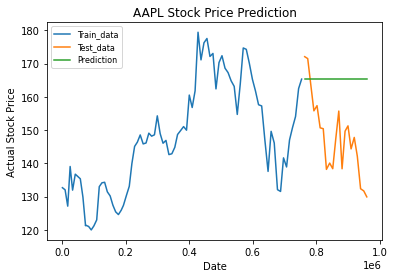

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-75.173, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-73.329, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-73.336, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-77.125, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.871 seconds


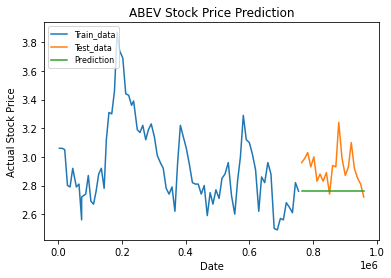

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=15.016, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=145.044, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=9.597, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=80.941, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=501.213, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=11.561, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=11.565, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=13.187, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.183 seconds


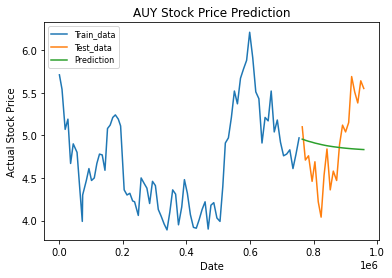

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-11.912, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-13.292, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-13.168, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-13.210, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-14.571, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-11.218, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.487 seconds


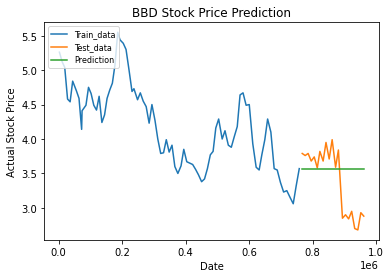

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=20.227, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=115.644, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=16.867, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=54.417, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=243.205, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=18.853, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=18.851, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=21.774, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.939 seconds


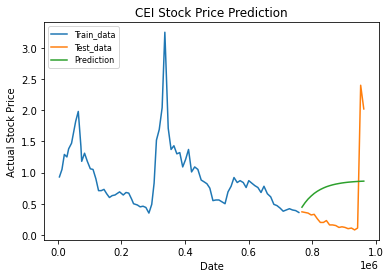

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=75.635, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=68.713, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=70.670, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=70.672, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=66.931, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=72.666, Time=0.15 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.559 seconds


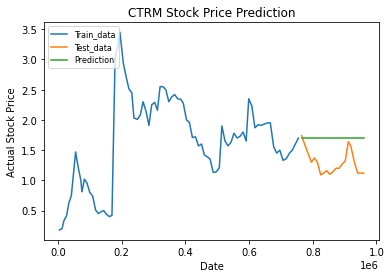

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=422.584, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=531.936, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=417.317, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=477.591, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=850.967, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=419.070, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=419.089, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=420.602, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.963 seconds


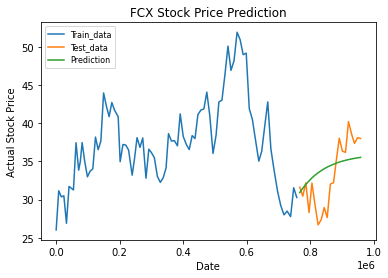

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=309.211, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=309.139, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=308.890, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=308.580, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.731 seconds


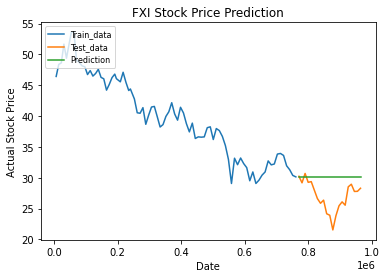

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22.018, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22.967, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=23.075, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20.297, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=24.906, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.697 seconds


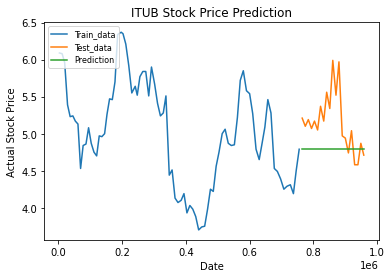

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=182.131, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=182.117, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=184.115, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=184.114, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=180.465, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.587 seconds


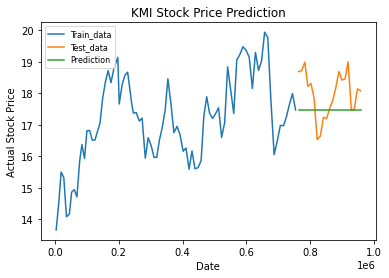

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=26.801, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=26.318, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25.586, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25.238, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=24.498, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=27.191, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.628 seconds


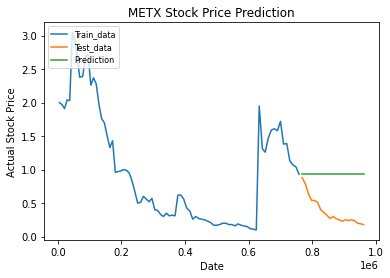

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3.102, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5.790, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6.657, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4.297, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-4.680, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-4.701, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-6.563, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-7.236, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-5.237, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-5.238, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-6.619, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-4.037, Time=0.18 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.515 seconds


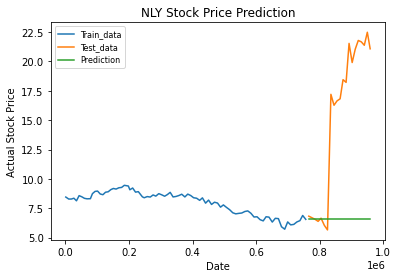

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-7.945, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-14.593, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-12.599, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-12.601, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-16.119, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-10.987, Time=0.18 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.594 seconds


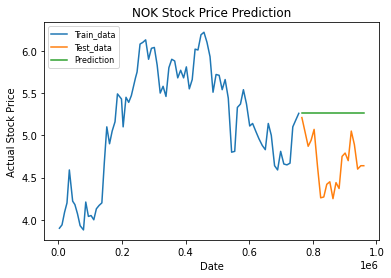

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=92.527, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=94.023, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=93.849, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=90.787, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=95.815, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.473 seconds


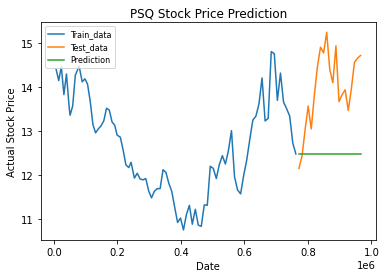

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=78.228, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=141.395, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=77.938, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=90.528, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=458.840, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=79.532, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=78.793, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=77.771, Time=0.24 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=77.636, Time=0.33 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=76.443, Time=0.12 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=77.214, Time=0.17 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=79.547, Time=0.46 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 2.143 seconds


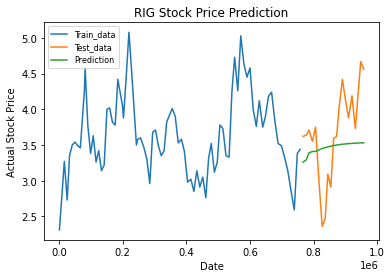

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=81.030, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=80.659, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=81.870, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=81.163, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=79.348, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=81.963, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.553 seconds


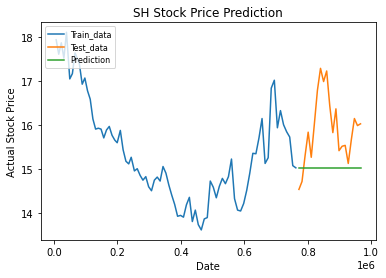

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=533.452, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=535.036, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=534.942, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=531.561, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=533.743, Time=0.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.619 seconds


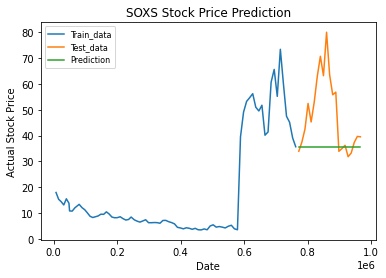

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=478.383, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=479.894, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=479.919, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=476.557, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=480.934, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.640 seconds


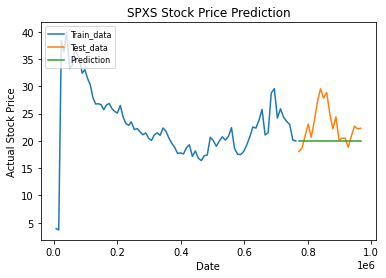

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=625.335, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=624.326, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=626.027, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=625.815, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=622.506, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=624.888, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.495 seconds


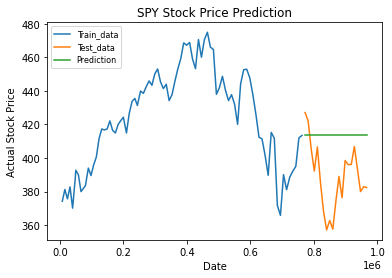

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=137.373, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=139.335, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=139.312, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=135.982, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.820 seconds


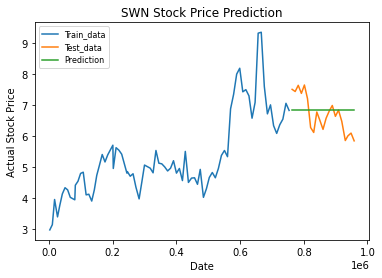

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=676.200, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=676.287, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=673.364, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=671.474, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=675.617, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=673.161, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=672.952, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=674.604, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=670.280, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=672.067, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=671.946, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=672.127, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=673.711, Time=0.10 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.150 seconds


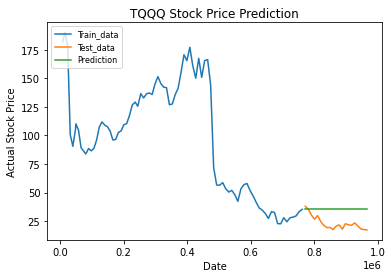

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=947.543, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=941.565, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=943.050, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=943.089, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=939.629, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=945.028, Time=0.15 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.695 seconds


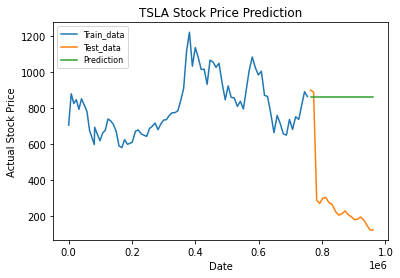

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=244.188, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=246.011, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=245.999, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=242.333, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=247.983, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.694 seconds


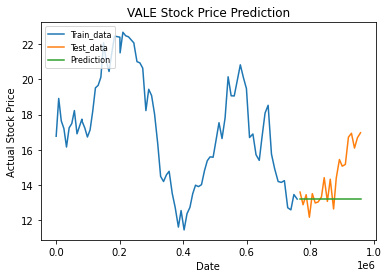

In [45]:
#Create an empty dictionary to store RMSE and symbols
rmse_dict = {'Symbol':[], 'RMSE':[]}

for symbol, (train_data, test_data) in train_test_data_dict.items():
    model = auto_arima(train_data['Price'], trace=True, error_action ='ignore', suppress_warnings=True)
    model.fit(train_data['Price'])
    forecast = model.predict(n_periods=len(test_data['Price']))

    # Model Evaluation
    mse = mean_squared_error(test_data['Price'], forecast)
    rmse = np.sqrt(mse)
    
    #Store RMSE and symbol in the dictionary
    rmse_dict['Symbol'].append(symbol)
    rmse_dict['RMSE'].append(rmse)
    
    #Visualization
    
    # Plot the predictions for validation set
    plt.plot(train_data['Price'], label='Train_data')
    plt.plot(test_data['Price'], label='Test_data')
    plt.plot(test_data.index, forecast, label='Prediction')
    
    plt.title(f'{symbol} Stock Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Actual Stock Price')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()


The model's prediction does not pick any fluctuations in price. The prediction graph is flat or smooth compared to the train and test data. The model's predictions are significantly different from the actual prices. The model might not be providing reliable forecasts. Since our goal is to use these forecasts for financial or investment decisions, it is important to improve the model. 

   Symbol        RMSE
0    AAPL   20.848470
1    ABEV    0.199141
2     AUY    0.488025
3     BBD    0.487051
4     CEI    0.692995
5    CTRM    0.448495
6     FCX    3.577727
7     FXI    3.892369
8    ITUB    0.520316
9     KMI    0.861753
10   METX    0.589802
11    NLY   10.767307
12    NOK    0.645305
13    PSQ    1.711630
14    RIG    0.626502
15     SH    1.147810
16   SOXS   18.416260
17   SPXS    4.285152
18    SPY   31.106976
19    SWN    0.587460
20   TQQQ   13.657331
21   TSLA  618.781213
22   VALE    1.948180


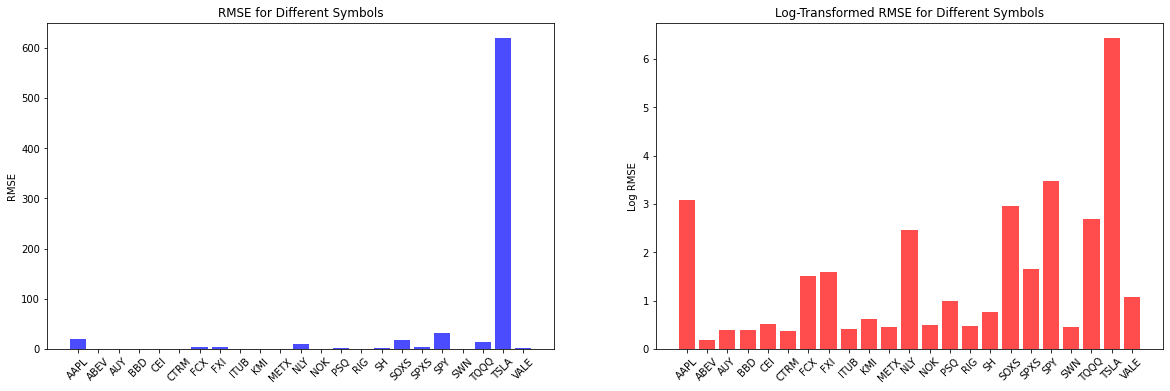

In [46]:
#Convert the dictionary to a dataframe
rmse_df = pd.DataFrame(rmse_dict)
print(rmse_df)
#Using a log scale for the RMSE values because TSLA has a very high RMSE
rmse_df['Log_RMSE'] = np.log1p(rmse_df['RMSE'])

#Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,6))

# Plot regular RMSE values
ax1.bar(rmse_df['Symbol'], rmse_df['RMSE'], color='b', alpha=0.7)
ax1.set_ylabel('RMSE')
ax1.set_title('RMSE for Different Symbols')

#Rotate x-axis tick labels
ax1.tick_params(axis='x', rotation=45)

# Plot regular RMSE values
ax2.bar(rmse_df['Symbol'], rmse_df['Log_RMSE'],color='r', alpha=0.7 )
ax2.set_ylabel('Log RMSE')
ax2.set_title('Log-Transformed RMSE for Different Symbols')

#Rotate x-axis tick labels
ax2.tick_params(axis='x', rotation=45)

# Show the plots
plt.show()

RMSE is the difference between predicted values and actual observed values. 
We notice that the RMSE for TSLA is quite high i.e. average stock price is 701 and RMSE is 618, suggesting the model's predictions are not accurate in relative terms. 
The RMSE scores for other symbols are relatively high too, suggesting a need for a more improved model that provides more accurate predictions.

## Data Scaling

In [47]:
# Initialize the StandardScaler
scaler = StandardScaler()

#Loop through the data in train_test_data_dict
for symbol, (train_data, test_data) in train_test_data_dict.items():
    #fit the scaler to the training data
    scaler.fit(train_data[['Price','Volume']])
    
    #Transform both training and testing data for both 'Price' and 'Volume' columns
    train_data_scaled = scaler.transform(train_data[['Price','Volume']])
    test_data_scaled = scaler.transform(test_data[['Price','Volume']])
    
    #Update the train_test_data_dict the scaled data
    train_test_data_dict[symbol] = (train_data_scaled, test_data_scaled)
    

## Model Building and Evaluation

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=64.756, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=66.466, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=66.438, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=63.156, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=68.426, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.652 seconds


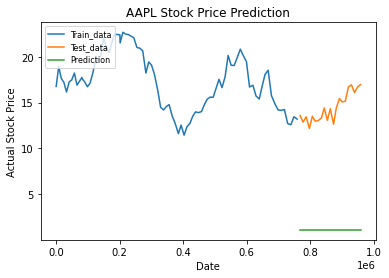

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=134.559, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=136.403, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=136.396, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=132.607, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.057 seconds


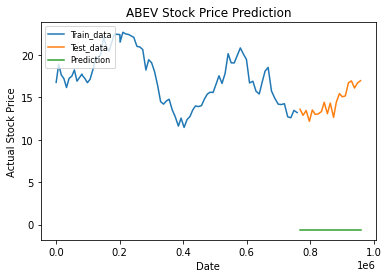

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=110.994, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=242.382, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=106.936, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=178.279, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=240.382, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=108.899, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=108.903, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=110.491, Time=0.27 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=105.160, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=107.116, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=107.121, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=176.283, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=108.731, Time=0.20 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.418 seconds


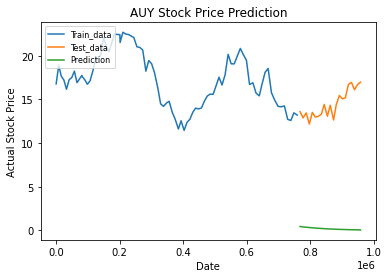

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=76.989, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=75.610, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=75.734, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=75.692, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=74.331, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=77.685, Time=0.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.739 seconds


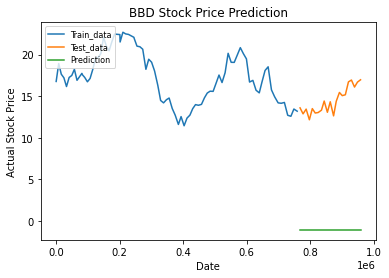

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=146.965, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=242.382, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=143.605, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=181.155, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=240.382, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=145.591, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=145.589, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=145.514, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=141.635, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=143.620, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=143.618, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=179.156, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=143.540, Time=0.10 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.875 seconds


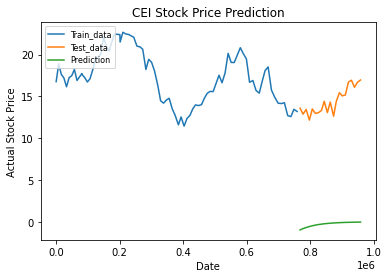

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=127.014, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=120.093, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=122.049, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=122.051, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=118.310, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=124.045, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.641 seconds


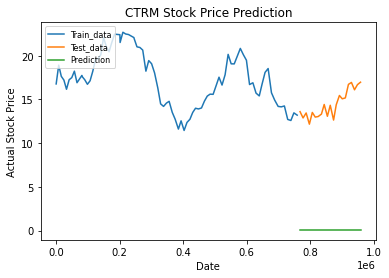

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=133.370, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=242.382, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=127.763, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=188.037, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=240.382, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=129.516, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=129.535, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=131.048, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=126.118, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=127.899, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=127.918, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=186.069, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=129.409, Time=0.07 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.828 seconds


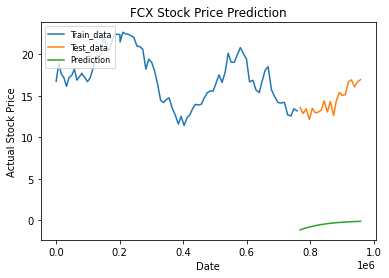

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4.123, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4.195, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-4.444, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4.753, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.924 seconds


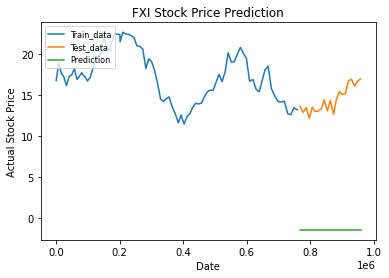

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=85.466, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=86.414, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=86.522, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=83.745, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=88.354, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.636 seconds


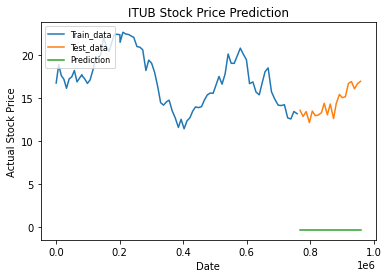

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=128.736, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=128.722, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=130.721, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=130.719, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=127.070, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.674 seconds


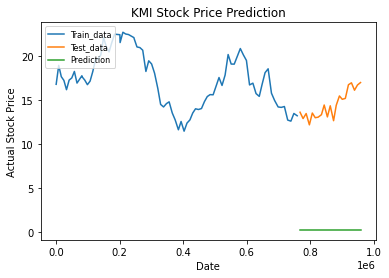

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=58.737, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=58.004, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=57.657, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=56.916, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=59.610, Time=0.23 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.789 seconds


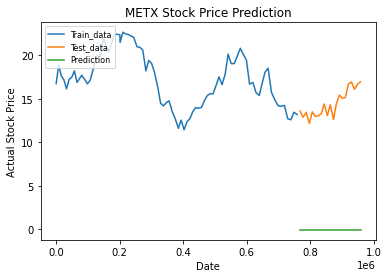

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1.011, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1.677, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2.544, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-0.184, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-0.567, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-0.588, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-2.450, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-3.123, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1.124, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1.125, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-2.506, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=0.076, Time=0.19 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.500 seconds


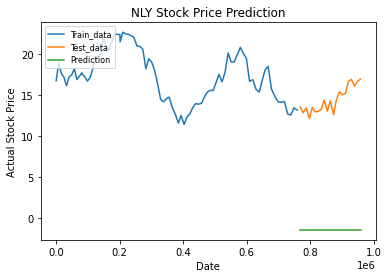

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=57.693, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=51.044, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=53.039, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=53.037, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=49.519, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=54.651, Time=0.42 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.863 seconds


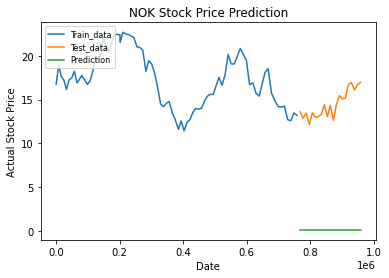

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=79.801, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=81.298, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=81.124, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=78.062, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=83.090, Time=0.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.709 seconds


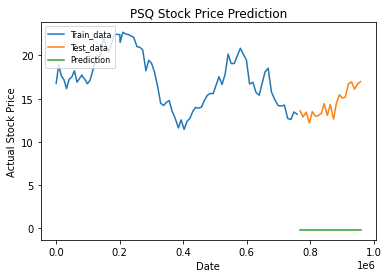

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=179.215, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=242.382, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=178.925, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=191.515, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=240.382, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=180.519, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=179.780, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=178.758, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=178.623, Time=0.16 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=177.430, Time=0.09 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=178.201, Time=0.13 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=180.534, Time=0.26 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=175.631, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=178.607, Time=0.04 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=176.3

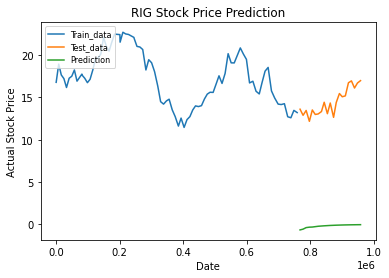

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=59.596, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=59.226, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=60.437, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=59.729, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=57.915, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=60.530, Time=0.22 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.575 seconds


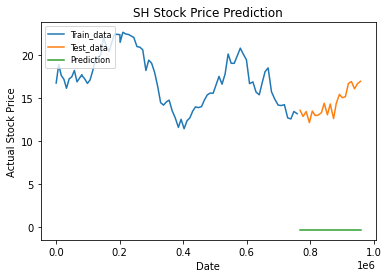

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=45.126, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=46.710, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=46.617, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=43.236, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=45.417, Time=0.19 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.903 seconds


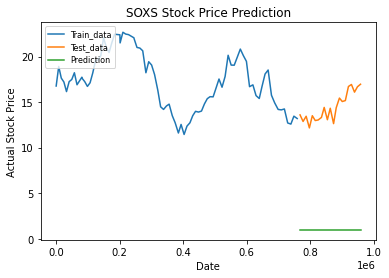

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=174.647, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=176.158, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=176.183, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=172.821, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=177.198, Time=0.14 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.817 seconds


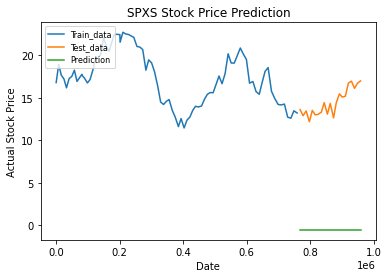

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=68.778, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=67.766, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=69.466, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=69.253, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=65.945, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=68.331, Time=0.14 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.536 seconds


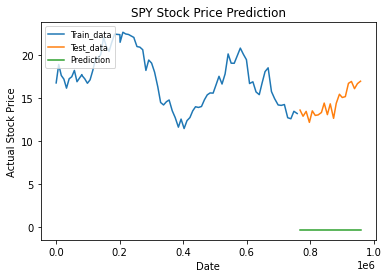

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=95.922, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=97.884, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=97.861, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=94.531, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.807 seconds


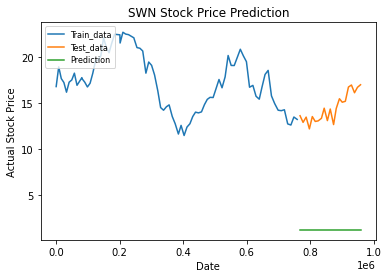

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=32.715, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=32.799, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=29.876, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=27.987, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=32.129, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=29.673, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=29.464, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=31.117, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=26.793, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=28.580, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=28.458, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=28.640, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=30.224, Time=0.15 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.252 seconds


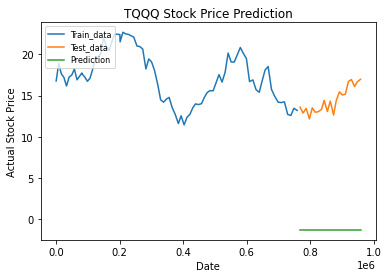

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=114.085, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=108.109, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=109.574, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=109.615, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=106.173, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=111.551, Time=0.14 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.812 seconds


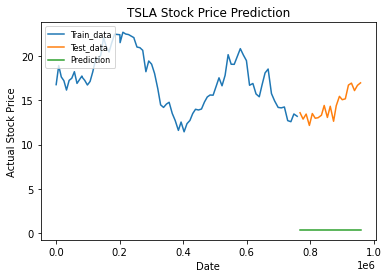

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=60.592, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=62.415, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=62.404, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=58.737, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=64.388, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.693 seconds


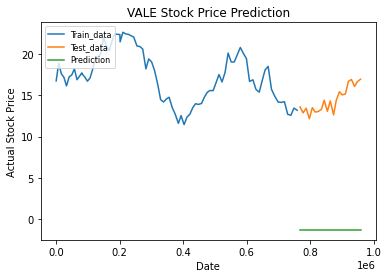

In [50]:
# Create an empty dictionary to store RMSE and symbols
scaled_rmse_dict = {'Symbol': [], 'Scaled_RMSE': []}

for symbol, (train_data_scaled, test_data_scaled) in train_test_data_dict.items():
    # Fit an ARIMA model
    model = auto_arima(train_data_scaled[:, 0], trace=True, error_action='ignore', suppress_warnings=True)
    model.fit(train_data_scaled[:, 0])
    forecast = model.predict(n_periods=len(test_data_scaled))

    # Model Evaluation
    mse = mean_squared_error(test_data_scaled[:, 0], forecast)
    rmse = np.sqrt(mse)

    # Store RMSE and symbol in the dictionary
    scaled_rmse_dict['Symbol'].append(symbol)
    scaled_rmse_dict['Scaled_RMSE'].append(rmse)
    
    #Visualization
    
    # Plot the predictions for validation set
    plt.plot(train_data['Price'], label='Train_data')
    plt.plot(test_data['Price'], label='Test_data')
    plt.plot(test_data.index, forecast, label='Prediction')
    
    plt.title(f'{symbol} Stock Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Actual Stock Price')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()
    

In [49]:
scaled_rmse_df = pd.DataFrame(scaled_rmse_dict)
rmse_combined = pd.merge(rmse_df, scaled_rmse_df, on='Symbol', how='outer')
rmse_combined= rmse_combined.drop('Log_RMSE', axis=1)
rmse_combined

Symbol        RMSE  Scaled_RMSE
0    AAPL   20.848470     1.285980
1    ABEV    0.199141     0.704479
2     AUY    0.488025     0.915401
3     BBD    0.487051     0.832077
4     CEI    0.692995     1.498073
5    CTRM    0.448495     0.611192
6     FCX    3.577727     0.681208
7     FXI    3.892369     0.589468
8    ITUB    0.520316     0.762538
9     KMI    0.861753     0.624727
10   METX    0.589802     0.717003
11    NLY   10.767307    11.037422
12    NOK    0.645305     0.958271
13    PSQ    1.711630     1.585324
14    RIG    0.626502     1.100362
15     SH    1.147810     1.008775
16   SOXS   18.416260     0.971915
17   SPXS    4.285152     0.687580
18    SPY   31.106976     1.088343
19    SWN    0.587460     0.457649
20   TQQQ   13.657331     0.283043
21   TSLA  618.781213     4.083413
22   VALE    1.948180     0.644615

Scaled and non-scaled data did not change the results. 